In [632]:
import panel as pn
import plotly.express as px
from panel.interact import interact
from panel import widgets
pn.extension('plotly')

import numpy as np
import pandas as pd
from pathlib import Path

import os
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

import requests

from dotenv import load_dotenv

import hvplot.pandas
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# New module requirement for project
#import pyfolio as pf

# silence warnings
#import warnings
#warnings.filterwarnings('ignore')

import time
from fredapi import Fred

start_time = time.time()

import warnings
warnings.filterwarnings('ignore')

In [633]:
columns_names1=["ETF_Ticker","ETF_Asset_Class", "ETF_Geography", "ETF_Name","Mini Robo Advisors Ultra Conserative Portfolio",
                "Mini Robo Advisors Conserative Portfolio",
                "Mini Robo Advisors Balanced Income Portfolio",
                "Mini Robo Advisors Balanced Growth Portfolio",
                "Mini Robo Advisors Moderate Growth Portfolio",
                "Mini Robo Advisors Aggressive Portfolio",
                "Mini Robo Advisors Ultra Aggressive Portfolio"] 
df_model_portfolio_asset_mix = pd.read_csv("AutoOutputFiles/ModelPortfolioAllocations.csv",names=columns_names1, header=0, index_col="ETF_Ticker").dropna()

# If we don't want the ETF_Ticker as an index (may impact charts)
#df_model_portfolio_asset_mix = pd.read_csv(file_path_model_asset_mix)

#df_model_portfolio_asset_mix = df_model_portfolio_asset_mix.dropna()
df_model_portfolio_asset_mix.head(20)

ETF_Asset_Class    ETF_Geography  \
ETF_Ticker                                    
IAGG          Fixed Income    International   
IEFA                Equity    International   
IEMG                Equity  Emerging Market   
IJH                 Equity               US   
IJR                 Equity               US   
IMTB          Fixed Income               US   
ISTB          Fixed Income               US   
IVV                 Equity               US   
USRT           Real Estate               US   

                                                 ETF_Name  \
ETF_Ticker                                                  
IAGG        iShares Core International Aggregate Bond ETF   
IEFA                           iShares Core MSCI EAFE ETF   
IEMG               iShares Core MSCI Emerging Markets ETF   
IJH                          iShares Core S&P Mid-Cap ETF   
IJR                        iShares Core S&P Small-Cap ETF   
IMTB                  iShares Core 5-10 Year USD Bond ETF   
ISTB                   iShares Core 1-5 Year USD Bond ETF   
IVV                              iShares Core S&P 500 ETF   
USRT                           iShares Core U.S. REIT ETF   

            Mini Robo Advisors Ultra Conserative Portfolio  \
ETF_Ticker                                                   
IAGG                                                  0.25   
IEFA                                                  0.00   
IEMG                                                  0.00   
IJH                                                   0.00   
IJR                                                   0.00   
IMTB                                                  0.13   
ISTB                                                  0.52   
IVV                                                   0.10   
USRT                                                  0.00   

            Mini Robo Advisors Conserative Portfolio  \
ETF_Ticker                                             
IAGG                                            0.25   
IEFA                                            0.05   
IEMG                                            0.00   
IJH                                             0.00   
IJR                                             0.00   
IMTB                                            0.09   
ISTB                                            0.46   
IVV                                             0.15   
USRT                                            0.00   

            Mini Robo Advisors Balanced Income Portfolio  \
ETF_Ticker                                                 
IAGG                                                0.22   
IEFA                                                0.12   
IEMG                                                0.00   
IJH                                                 0.00   
IJR                                                 0.03   
IMTB                                                0.05   
ISTB                                                0.33   
IVV                                                 0.25   
USRT                                                0.00   

            Mini Robo Advisors Balanced Growth Portfolio  \
ETF_Ticker                                                 
IAGG                                                0.12   
IEFA                                                0.18   
IEMG                                                0.04   
IJH                                                 0.00   
IJR                                                 0.03   
IMTB                                                0.09   
ISTB                                                0.24   
IVV                                                 0.30   
USRT                                                0.00   

            Mini Robo Advisors Moderate Growth Portfolio  \
ETF_Ticker                                                 
IAGG                                                0.08   
IEFA               

In [634]:
#Read in 10000000 cvs files
df_closing_prices = pd.read_csv("AutoOutputFiles/df_closing_prices.csv").dropna()
df_ticker = pd.read_csv("AutoOutputFiles/df_ticker.csv").dropna()
iShares_Data= pd.read_csv("AutoOutputFiles/iShares_Data.csv", index_col = "ETF Ticker")
Model_Port_HVPLOT = pd.read_csv("AutoOutputFiles/Model_Port_HVPLOT.csv",index_col = "Portfolio")
model_portfolio_1_sc1_MC_portfolio_data_1_year= pd.read_csv("AutoOutputFiles/model_portfolio_1_sc1_MC_portfolio_data_1_year.csv").dropna()
Model_Port_HVPLOTS = pd.read_csv("AutoOutputFiles/Model_Port_HVPLOTS.csv",index_col = "Portfolio")

In [635]:
model_portfolio_1_sc1_MC_portfolio_dist_cum_ret_1_year = pd.read_csv("AutoOutputFiles/model_portfolio_1_sc1_MC_portfolio_dist_cum_ret_1_year.csv").dropna()
model_portfolio_1_sc2_MC_portfolio_data_5_year=pd.read_csv("AutoOutputFiles/model_portfolio_1_sc2_MC_portfolio_data_5_year.csv").dropna()
model_portfolio_1_sc2_MC_portfolio_dist_cum_ret_5_year=pd.read_csv("AutoOutputFiles/model_portfolio_1_sc2_MC_portfolio_dist_cum_ret_5_year.csv").dropna()
model_portfolio_1_sc3_MC_portfolio_data_10_year=pd.read_csv("AutoOutputFiles/model_portfolio_1_sc3_MC_portfolio_data_10_year.csv").dropna()
model_portfolio_1_sc3_MC_portfolio_dist_cum_ret_10_year=pd.read_csv("AutoOutputFiles/model_portfolio_1_sc3_MC_portfolio_dist_cum_ret_10_year.csv").dropna()
model_portfolio_1_sc4_MC_portfolio_data_25_year=pd.read_csv("AutoOutputFiles/model_portfolio_1_sc4_MC_portfolio_data_25_year.csv").dropna()
model_portfolio_1_sc4_MC_portfolio_dist_cum_ret_25_year=pd.read_csv("AutoOutputFiles/model_portfolio_1_sc4_MC_portfolio_dist_cum_ret_25_year.csv").dropna()
model_portfolio_1_sc5_MC_portfolio_data_30_year=pd.read_csv("AutoOutputFiles/model_portfolio_1_sc5_MC_portfolio_data_30_year.csv").dropna
model_portfolio_1_sc5_MC_portfolio_dist_cum_ret_30_year=pd.read_csv("AutoOutputFiles/model_portfolio_1_sc5_MC_portfolio_dist_cum_ret_30_year.csv").dropna
model_portfolio_1_sum_stat_tbl_10year=pd.read_csv("AutoOutputFiles/model_portfolio_1_sum_stat_tbl_10year.csv").dropna
model_portfolio_1_sum_stat_tbl_1year=pd.read_csv("AutoOutputFiles/model_portfolio_1_sum_stat_tbl_1year.csv").dropna()
model_portfolio_1_sum_stat_tbl_25year=pd.read_csv("AutoOutputFiles/model_portfolio_1_sum_stat_tbl_25year.csv").dropna()
model_portfolio_1_sum_stat_tbl_30year=pd.read_csv("AutoOutputFiles/model_portfolio_1_sum_stat_tbl_30year.csv").dropna()
model_portfolio_1_sum_stat_tbl_5year=pd.read_csv("AutoOutputFiles/model_portfolio_1_sum_stat_tbl_5year.csv").dropna
model_portfolio_2_sc1_MC_portfolio_data_1_year=pd.read_csv("AutoOutputFiles/model_portfolio_2_sc1_MC_portfolio_data_1_year.csv").dropna()
model_portfolio_2_sc1_MC_portfolio_dist_cum_ret_1_year=pd.read_csv("AutoOutputFiles/model_portfolio_2_sc1_MC_portfolio_dist_cum_ret_1_year.csv").dropna()
model_portfolio_2_sc2_MC_portfolio_data_5_year=pd.read_csv("AutoOutputFiles/model_portfolio_2_sc2_MC_portfolio_data_5_year.csv").dropna()
model_portfolio_2_sc2_MC_portfolio_dist_cum_ret_5_year=pd.read_csv("AutoOutputFiles/model_portfolio_2_sc2_MC_portfolio_dist_cum_ret_5_year.csv").dropna()
model_portfolio_2_sc3_MC_portfolio_data_10_year=pd.read_csv("AutoOutputFiles/model_portfolio_2_sc3_MC_portfolio_data_10_year.csv").dropna()
model_portfolio_2_sc3_MC_portfolio_dist_cum_ret_10_year=pd.read_csv("AutoOutputFiles/model_portfolio_2_sc3_MC_portfolio_dist_cum_ret_10_year.csv").dropna()
model_portfolio_2_sc4_MC_portfolio_data_25_year=pd.read_csv("AutoOutputFiles/model_portfolio_2_sc4_MC_portfolio_data_25_year.csv").dropna()
model_portfolio_2_sc4_MC_portfolio_dist_cum_ret_25_year=pd.read_csv("AutoOutputFiles/model_portfolio_2_sc4_MC_portfolio_dist_cum_ret_25_year.csv").dropna()
model_portfolio_2_sc4_MC_portfolio_dist_cum_ret_30_year=pd.read_csv("AutoOutputFiles/model_portfolio_2_sc4_MC_portfolio_dist_cum_ret_30_year.csv").dropna()
model_portfolio_2_sc5_MC_portfolio_data_30_year=pd.read_csv("AutoOutputFiles/model_portfolio_2_sc5_MC_portfolio_data_30_year.csv").dropna()
model_portfolio_2_sum_stat_tbl_10year=pd.read_csv("AutoOutputFiles/model_portfolio_2_sum_stat_tbl_10year.csv").dropna()
model_portfolio_2_sum_stat_tbl_1year=pd.read_csv("AutoOutputFiles/model_portfolio_2_sum_stat_tbl_1year.csv").dropna()
model_portfolio_2_sum_stat_tbl_25year=pd.read_csv("AutoOutputFiles/model_portfolio_2_sum_stat_tbl_25year.csv").dropna()
model_portfolio_2_sum_stat_tbl_30year=pd.read_csv("AutoOutputFiles/model_portfolio_2_sum_stat_tbl_30year.csv").dropna()
model_portfolio_2_sum_stat_tbl_5year=pd.read_csv("AutoOutputFiles/model_portfolio_2_sum_stat_tbl_5year.csv").dropna()
model_portfolio_3_sc1_MC_portfolio_data_1_year=pd.read_csv("AutoOutputFiles/model_portfolio_3_sc1_MC_portfolio_data_1_year.csv").dropna()
model_portfolio_3_sc1_MC_portfolio_dist_cum_ret_1_year=pd.read_csv("AutoOutputFiles/model_portfolio_3_sc1_MC_portfolio_dist_cum_ret_1_year.csv").dropna()
model_portfolio_3_sc2_MC_portfolio_data_5_year=pd.read_csv("AutoOutputFiles/model_portfolio_3_sc2_MC_portfolio_data_5_year.csv").dropna()
model_portfolio_3_sc2_MC_portfolio_dist_cum_ret_5_year=pd.read_csv("AutoOutputFiles/model_portfolio_3_sc2_MC_portfolio_dist_cum_ret_5_year.csv").dropna()
model_portfolio_3_sc3_MC_portfolio_data_10_year=pd.read_csv("AutoOutputFiles/model_portfolio_3_sc3_MC_portfolio_data_10_year.csv").dropna()
model_portfolio_3_sc3_MC_portfolio_dist_cum_ret_10_year=pd.read_csv("AutoOutputFiles/model_portfolio_3_sc3_MC_portfolio_dist_cum_ret_10_year.csv").dropna()
model_portfolio_3_sc4_MC_portfolio_data_25_year=pd.read_csv("AutoOutputFiles/model_portfolio_3_sc4_MC_portfolio_data_25_year.csv").dropna()
model_portfolio_3_sc4_MC_portfolio_dist_cum_ret_25_year=pd.read_csv("AutoOutputFiles/model_portfolio_3_sc4_MC_portfolio_dist_cum_ret_25_year.csv").dropna()
model_portfolio_3_sc5_MC_portfolio_data_30_year=pd.read_csv("AutoOutputFiles/model_portfolio_3_sc5_MC_portfolio_data_30_year.csv").dropna()
model_portfolio_3_sc5_MC_portfolio_dist_cum_ret_30_year=pd.read_csv("AutoOutputFiles/model_portfolio_3_sc5_MC_portfolio_dist_cum_ret_30_year.csv").dropna()
model_portfolio_3_sum_stat_tbl_10year=pd.read_csv("AutoOutputFiles/model_portfolio_3_sum_stat_tbl_10year.csv").dropna()
model_portfolio_3_sum_stat_tbl_1year=pd.read_csv("AutoOutputFiles/model_portfolio_3_sum_stat_tbl_1year.csv").dropna()
model_portfolio_3_sum_stat_tbl_25year=pd.read_csv("AutoOutputFiles/model_portfolio_3_sum_stat_tbl_25year.csv").dropna()
model_portfolio_3_sum_stat_tbl_30year=pd.read_csv("AutoOutputFiles/model_portfolio_3_sum_stat_tbl_30year.csv").dropna()
model_portfolio_3_sum_stat_tbl_5year=pd.read_csv("AutoOutputFiles/model_portfolio_3_sum_stat_tbl_5year.csv").dropna()
model_portfolio_4_sc1_MC_portfolio_data_1_year=pd.read_csv("AutoOutputFiles/model_portfolio_4_sc1_MC_portfolio_data_1_year.csv").dropna()
model_portfolio_4_sc1_MC_portfolio_dist_cum_ret_1_year=pd.read_csv("AutoOutputFiles/model_portfolio_4_sc1_MC_portfolio_dist_cum_ret_1_year.csv").dropna()
model_portfolio_4_sc1_MC_portfolio_dist_cum_ret_1_year=pd.read_csv("AutoOutputFiles/model_portfolio_4_sc1_MC_portfolio_dist_cum_ret_1_year.csv").dropna()
model_portfolio_4_sc2_MC_portfolio_dist_cum_ret_5_year=pd.read_csv("AutoOutputFiles/model_portfolio_4_sc2_MC_portfolio_dist_cum_ret_5_year.csv").dropna()
model_portfolio_4_sc3_MC_portfolio_data_10_year=pd.read_csv("AutoOutputFiles/model_portfolio_4_sc3_MC_portfolio_data_10_year.csv").dropna()
model_portfolio_4_sc3_MC_portfolio_dist_cum_ret_10_year=pd.read_csv("AutoOutputFiles/model_portfolio_4_sc3_MC_portfolio_dist_cum_ret_10_year.csv").dropna()
model_portfolio_4_sc4_MC_portfolio_data_25_year=pd.read_csv("AutoOutputFiles/model_portfolio_4_sc4_MC_portfolio_data_25_year.csv").dropna()
model_portfolio_4_sc4_MC_portfolio_dist_cum_ret_25_year=pd.read_csv("AutoOutputFiles/model_portfolio_4_sc4_MC_portfolio_dist_cum_ret_25_year.csv").dropna()
model_portfolio_4_sc5_MC_portfolio_data_30_year=pd.read_csv("AutoOutputFiles/model_portfolio_4_sc5_MC_portfolio_data_30_year.csv").dropna()
model_portfolio_4_sc5_MC_portfolio_dist_cum_ret_30_year=pd.read_csv("AutoOutputFiles/model_portfolio_4_sc5_MC_portfolio_dist_cum_ret_30_year.csv").dropna()
model_portfolio_4_sum_stat_tbl_10year=pd.read_csv("AutoOutputFiles/model_portfolio_4_sum_stat_tbl_10year.csv").dropna()
model_portfolio_4_sum_stat_tbl_1year=pd.read_csv("AutoOutputFiles/model_portfolio_4_sum_stat_tbl_1year.csv").dropna()
model_portfolio_4_sum_stat_tbl_25year=pd.read_csv("AutoOutputFiles/model_portfolio_4_sum_stat_tbl_25year.csv").dropna()
model_portfolio_4_sum_stat_tbl_30year=pd.read_csv("AutoOutputFiles/model_portfolio_4_sum_stat_tbl_30year.csv").dropna()
model_portfolio_4_sum_stat_tbl_5year=pd.read_csv("AutoOutputFiles/model_portfolio_4_sum_stat_tbl_5year.csv").dropna()
model_portfolio_5_sc1_MC_portfolio_data_1_year=pd.read_csv("AutoOutputFiles/model_portfolio_5_sc1_MC_portfolio_data_1_year.csv").dropna()
model_portfolio_5_sc1_MC_portfolio_dist_cum_ret_1_year=pd.read_csv("AutoOutputFiles/model_portfolio_5_sc1_MC_portfolio_dist_cum_ret_1_year.csv").dropna()
model_portfolio_5_sc2_MC_portfolio_data_5_year=pd.read_csv("AutoOutputFiles/model_portfolio_5_sc2_MC_portfolio_data_5_year.csv").dropna()
model_portfolio_5_sc2_MC_portfolio_dist_cum_ret_5_year=pd.read_csv("AutoOutputFiles/model_portfolio_5_sc2_MC_portfolio_dist_cum_ret_5_year.csv").dropna()
model_portfolio_5_sc3_MC_portfolio_data_10_year=pd.read_csv("AutoOutputFiles/model_portfolio_5_sc3_MC_portfolio_data_10_year.csv").dropna()
model_portfolio_5_sc3_MC_portfolio_dist_cum_ret_10_year=pd.read_csv("AutoOutputFiles/model_portfolio_5_sc3_MC_portfolio_dist_cum_ret_10_year.csv").dropna()
model_portfolio_5_sc4_MC_portfolio_data_25_year=pd.read_csv("AutoOutputFiles/model_portfolio_5_sc4_MC_portfolio_data_25_year.csv").dropna()
model_portfolio_5_sc4_MC_portfolio_dist_cum_ret_25_year=pd.read_csv("AutoOutputFiles/model_portfolio_5_sc4_MC_portfolio_dist_cum_ret_25_year.csv").dropna()
model_portfolio_5_sc5_MC_portfolio_data_30_year=pd.read_csv("AutoOutputFiles/model_portfolio_5_sc5_MC_portfolio_data_30_year.csv").dropna()
model_portfolio_5_sc5_MC_portfolio_dist_cum_ret_30_year=pd.read_csv("AutoOutputFiles/model_portfolio_5_sc5_MC_portfolio_dist_cum_ret_30_year.csv").dropna()
model_portfolio_5_sum_stat_tbl_10year=pd.read_csv("AutoOutputFiles/model_portfolio_5_sum_stat_tbl_10year.csv").dropna()
model_portfolio_5_sum_stat_tbl_1year=pd.read_csv("AutoOutputFiles/model_portfolio_5_sum_stat_tbl_1year.csv").dropna()
model_portfolio_5_sum_stat_tbl_25year=pd.read_csv("AutoOutputFiles/model_portfolio_5_sum_stat_tbl_25year.csv").dropna()
model_portfolio_5_sum_stat_tbl_30year=pd.read_csv("AutoOutputFiles/model_portfolio_5_sum_stat_tbl_30year.csv").dropna()
model_portfolio_5_sum_stat_tbl_5year=pd.read_csv("AutoOutputFiles/model_portfolio_5_sum_stat_tbl_5year.csv").dropna()
model_portfolio_6_sc1_MC_portfolio_data_1_year=pd.read_csv("AutoOutputFiles/model_portfolio_6_sc1_MC_portfolio_data_1_year.csv").dropna()
model_portfolio_6_sc1_MC_portfolio_dist_cum_ret_1_year=pd.read_csv("AutoOutputFiles/model_portfolio_6_sc1_MC_portfolio_dist_cum_ret_1_year.csv").dropna()
model_portfolio_6_sc2_MC_portfolio_data_5_year=pd.read_csv("AutoOutputFiles/model_portfolio_6_sc2_MC_portfolio_data_5_year.csv").dropna()
model_portfolio_6_sc2_MC_portfolio_dist_cum_ret_5_year=pd.read_csv("AutoOutputFiles/model_portfolio_6_sc2_MC_portfolio_dist_cum_ret_5_year.csv").dropna()
model_portfolio_6_sc3_MC_portfolio_data_10_year=pd.read_csv("AutoOutputFiles/model_portfolio_6_sc3_MC_portfolio_data_10_year.csv").dropna()
model_portfolio_6_sc3_MC_portfolio_dist_cum_ret_10_year=pd.read_csv("AutoOutputFiles/model_portfolio_6_sc3_MC_portfolio_dist_cum_ret_10_year.csv").dropna()
model_portfolio_6_sc4_MC_portfolio_data_25_year=pd.read_csv("AutoOutputFiles/model_portfolio_6_sc4_MC_portfolio_data_25_year.csv").dropna()
model_portfolio_6_sc4_MC_portfolio_dist_cum_ret_25_year=pd.read_csv("AutoOutputFiles/model_portfolio_6_sc4_MC_portfolio_dist_cum_ret_25_year.csv").dropna()
model_portfolio_6_sc5_MC_portfolio_data_30_year=pd.read_csv("AutoOutputFiles/model_portfolio_6_sc5_MC_portfolio_data_30_year.csv").dropna()
model_portfolio_6_sc5_MC_portfolio_dist_cum_ret_30_year=pd.read_csv("AutoOutputFiles/model_portfolio_6_sc5_MC_portfolio_dist_cum_ret_30_year.csv").dropna()
model_portfolio_6_sum_stat_tbl_1year=pd.read_csv("AutoOutputFiles/model_portfolio_6_sum_stat_tbl_1year.csv").dropna()
model_portfolio_6_sum_stat_tbl_25year=pd.read_csv("AutoOutputFiles/model_portfolio_6_sum_stat_tbl_25year.csv").dropna()
model_portfolio_6_sum_stat_tbl_30year=pd.read_csv("AutoOutputFiles/model_portfolio_6_sum_stat_tbl_30year.csv").dropna()
model_portfolio_6_sum_stat_tbl_5year=pd.read_csv("AutoOutputFiles/model_portfolio_6_sum_stat_tbl_5year.csv").dropna()
model_portfolio_7_sc1_MC_portfolio_data_1_year=pd.read_csv("AutoOutputFiles/model_portfolio_7_sc1_MC_portfolio_data_1_year.csv").dropna()
model_portfolio_7_sc1_MC_portfolio_dist_cum_ret_1_year=pd.read_csv("AutoOutputFiles/model_portfolio_7_sc1_MC_portfolio_dist_cum_ret_1_year.csv").dropna()
model_portfolio_7_sc2_MC_portfolio_data_5_year=pd.read_csv("AutoOutputFiles/model_portfolio_7_sc2_MC_portfolio_data_5_year.csv").dropna()
model_portfolio_7_sc2_MC_portfolio_dist_cum_ret_5_year=pd.read_csv("AutoOutputFiles/model_portfolio_7_sc2_MC_portfolio_dist_cum_ret_5_year.csv").dropna()
model_portfolio_7_sc3_MC_portfolio_data_10_year=pd.read_csv("AutoOutputFiles/model_portfolio_7_sc3_MC_portfolio_data_10_year.csv").dropna()
model_portfolio_7_sc3_MC_portfolio_dist_cum_ret_10_year=pd.read_csv("AutoOutputFiles/model_portfolio_7_sc3_MC_portfolio_dist_cum_ret_10_year.csv").dropna()
model_portfolio_7_sc4_MC_portfolio_data_25_year=pd.read_csv("AutoOutputFiles/model_portfolio_7_sc4_MC_portfolio_data_25_year.csv").dropna()
model_portfolio_7_sc4_MC_portfolio_dist_cum_ret_30_year=pd.read_csv("AutoOutputFiles/model_portfolio_7_sc4_MC_portfolio_dist_cum_ret_30_year.csv").dropna()
ModelPortfolioAllocations=pd.read_csv("AutoOutputFiles/ModelPortfolioAllocations.csv").dropna()


In [636]:
# Set Alpaca API key and secret
load_dotenv()
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [637]:
# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [638]:
#FRED DATA
load_dotenv()
Fred_api = os.getenv("FRED_API_KEY")
#CAN DELETE IF WORKS FOR YOU fred = Fred(api_key='')
data = fred.get_series('SP500')

In [639]:
# Inserting a Logo
from IPython.display import Image
MRA_Financial=Image("MRA Financials.png", width="100")
Mini_Robo_Advisors=Image("Mini_Robo_Advisors.png")

In [640]:
# Format current date as ISO format
# Calling the past 5 years of daily price level data, with a 1000 limit
# Will receive less data then 5 years based on 1000 limit (5 * 252 = 1,260 data points)
start_date = pd.Timestamp("2016-06-25", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-06-25", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["IAGG", "IEFA", "IEMG", "IJH", "IJR", "IMTB", "ISTB", "IVV", "USRT"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)

df_ticker = api.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 1000
).df

# Drop NA from data set
df_ticker = df_ticker.dropna()

# Drop the time component of the date
df_ticker.index = df_ticker.index.date

# Display sample data
df_ticker.tail()

IAGG                                   IEFA                   \
             open   high    low   close    volume   open     high     low   
2021-06-21  55.04  55.04  54.99  55.035  540613.0  74.76  75.4500  74.630   
2021-06-22  55.10  55.10  54.91  54.920  157720.0  75.19  75.6186  75.030   
2021-06-23  54.96  54.97  54.93  54.940   80633.0  75.36  75.4200  74.875   
2021-06-24  54.99  55.06  54.99  55.060  868936.0  75.51  75.6950  75.463   
2021-06-25  54.96  54.96  54.90  54.905   87274.0  75.88  75.9174  75.710   

                               ...     IVV                                     \
             close     volume  ...    open    high     low   close     volume   
2021-06-21  75.415  7510011.0  ...  418.60  422.87  417.73  422.66  3396972.0   
2021-06-22  75.460  7232766.0  ...  422.67  425.79  421.89  424.87  2743334.0   
2021-06-23  75.010  5701272.0  ...  424.97  425.86  424.33  424.43  2325227.0   
2021-06-24  75.690  4386728.0  ...  426.69  427.38  426.44  426.90  4386195.0   
2021-06-25  75.880  3608385.0  ...  427.76  428.91  427.40  428.43  3803626.0   

             USRT                                    
             open    high      low  close    volume  
2021-06-21  58.25  59.520  58.1200  59.34  161100.0  
2021-06-22  59.41  59.410  58.9223  59.04  142455.0  
2021-06-23  59.05  59.240  58.8400  58.96  179959.0  
2021-06-24  59.08  59.080  58.4153  58.72  145376.0  
2021-06-25  58.73  59.215  58.6100  59.19  147717.0  

[5 rows x 45 columns]

In [641]:
# Create and empty DataFrame for closing prices
df_closing_prices = pd.DataFrame()

# Fetch the closing prices for all the tickers
for ticker in tickers:
    df_closing_prices[ticker] = df_ticker[ticker]["close"]

In [642]:
# Confirm the shape of the data frame
df_closing_prices.shape

(996, 9)

In [643]:
#Weights
# Model Portfolio 1

# Weights
model_portfolio_1_weights = 0.25,0.00,0.00,0.0,0.0,0.13,0.52,0.1,0.0
#model_portfolio_1_iagg_weight = 0.25
#model_portfolio_1_iefa_weight = 0.00
#model_portfolio_1_iemg_weight = 0.00
#model_portfolio_1_ijh_weight = 0.00
#model_portfolio_1_ijr_weight = 0.00
#model_portfolio_1_imtb_weight = 0.13
#model_portfolio_1_istb_weight = 0.52
#model_portfolio_1_ivv_weight = 0.10
#model_portfolio_1_usrt_weight = 0.00
print(model_portfolio_1_weights)

Model_1_Weights = [0.25,0.00,0.00,0.00,0.0,0.13,0.52,0.1,0.0]

# Define the number of simulation runs
model_portfolio_1_sim_runs = 10

# Define the time horizon
model_portfolio_1_time_horizon_sc1 = 1
model_portfolio_1_time_horizon_sc2 = 5
model_portfolio_1_time_horizon_sc3 = 10
model_portfolio_1_time_horizon_sc4 = 25
model_portfolio_1_time_horizon_sc5 = 30

# Define the number of days per annum
model_portfolio_1_year_def = 252

# Define the total trading days in time horizon
model_portfolio_1_trading_days_sc1 = model_portfolio_1_time_horizon_sc1 * model_portfolio_1_year_def
model_portfolio_1_trading_days_sc2 = model_portfolio_1_time_horizon_sc2 * model_portfolio_1_year_def
model_portfolio_1_trading_days_sc3 = model_portfolio_1_time_horizon_sc3 * model_portfolio_1_year_def
model_portfolio_1_trading_days_sc4 = model_portfolio_1_time_horizon_sc4 * model_portfolio_1_year_def
model_portfolio_1_trading_days_sc5 = model_portfolio_1_time_horizon_sc5 * model_portfolio_1_year_def

(0.25, 0.0, 0.0, 0.0, 0.0, 0.13, 0.52, 0.1, 0.0)


In [644]:
# Model Portfolio 2

# Weights
model_portfolio_2_weights = [0.25, 0.05,0.0,0.0,0.0,0.09,0.46,0.15,0.0]

# Define the number of simulation runs
model_portfolio_2_sim_runs = 10

# Define the time horizon
model_portfolio_2_time_horizon_sc1 = 1
model_portfolio_2_time_horizon_sc2 = 5
model_portfolio_2_time_horizon_sc3 = 10
model_portfolio_2_time_horizon_sc4 = 25
model_portfolio_2_time_horizon_sc5 = 30

# Define the number of days per annum
model_portfolio_2_year_def = 252

# Define the total trading days in time horizon
model_portfolio_2_trading_days_sc1 = model_portfolio_2_time_horizon_sc1 * model_portfolio_2_year_def
model_portfolio_2_trading_days_sc2 = model_portfolio_2_time_horizon_sc2 * model_portfolio_2_year_def
model_portfolio_2_trading_days_sc3 = model_portfolio_2_time_horizon_sc3 * model_portfolio_2_year_def
model_portfolio_2_trading_days_sc4 = model_portfolio_2_time_horizon_sc4 * model_portfolio_2_year_def
model_portfolio_2_trading_days_sc5 = model_portfolio_2_time_horizon_sc5 * model_portfolio_2_year_def

In [645]:
# Model Portfolio 3

# Weights
model_portfolio_3_weights = [0.22,0.12,0.0,0.0,0.03,0.05,0.33,0.25,0.0]

# Define the number of simulation runs
model_portfolio_3_sim_runs = 10

# Define the time horizon
model_portfolio_3_time_horizon_sc1 = 1
model_portfolio_3_time_horizon_sc2 = 5
model_portfolio_3_time_horizon_sc3 = 10
model_portfolio_3_time_horizon_sc4 = 25
model_portfolio_3_time_horizon_sc5 = 30

# Define the number of days per annum
model_portfolio_3_year_def = 252

# Define the total trading days in time horizon
model_portfolio_3_trading_days_sc1 = model_portfolio_3_time_horizon_sc1 * model_portfolio_3_year_def
model_portfolio_3_trading_days_sc2 = model_portfolio_3_time_horizon_sc2 * model_portfolio_3_year_def
model_portfolio_3_trading_days_sc3 = model_portfolio_3_time_horizon_sc3 * model_portfolio_3_year_def
model_portfolio_3_trading_days_sc4 = model_portfolio_3_time_horizon_sc4 * model_portfolio_3_year_def
model_portfolio_3_trading_days_sc5 = model_portfolio_3_time_horizon_sc5 * model_portfolio_3_year_def

In [646]:
# Model Portfolio 4

# Weights
model_portfolio_4_weights = [0.12,0.18,0.04,0.0,0.03,0.09,0.24,0.3,0.0]
# Define the number of simulation runs
model_portfolio_4_sim_runs = 10

# Define the time horizon
model_portfolio_4_time_horizon_sc1 = 1
model_portfolio_4_time_horizon_sc2 = 5
model_portfolio_4_time_horizon_sc3 = 10
model_portfolio_4_time_horizon_sc4 = 25
model_portfolio_4_time_horizon_sc5 = 25

# Define the number of days per annum
model_portfolio_4_year_def = 252

# Define the total trading days in time horizon
model_portfolio_4_trading_days_sc1 = model_portfolio_4_time_horizon_sc1 * model_portfolio_4_year_def
model_portfolio_4_trading_days_sc2 = model_portfolio_4_time_horizon_sc2 * model_portfolio_4_year_def
model_portfolio_4_trading_days_sc3 = model_portfolio_4_time_horizon_sc3 * model_portfolio_4_year_def
model_portfolio_4_trading_days_sc4 = model_portfolio_4_time_horizon_sc4 * model_portfolio_4_year_def
model_portfolio_4_trading_days_sc5 = model_portfolio_4_time_horizon_sc5 * model_portfolio_4_year_def

In [647]:
# Model Portfolio 5

# Weights
model_portfolio_5_weights = [0.08,0.24,0.05,0.05,0.03,0.08,0.14,0.3,0.03]
# Define the number of simulation runs
model_portfolio_5_sim_runs = 10

# Define the time horizon
# We need to calculate this based on KYC response or do we provide several scenarios over multiple time horizons?
model_portfolio_5_time_horizon_sc1 = 1
model_portfolio_5_time_horizon_sc2 = 5
model_portfolio_5_time_horizon_sc3 = 10
model_portfolio_5_time_horizon_sc4 = 25
model_portfolio_5_time_horizon_sc5 = 30

# Define the number of days per annum
model_portfolio_5_year_def = 252

# Define the total trading days in time horizon
model_portfolio_5_trading_days_sc1 = model_portfolio_5_time_horizon_sc1 * model_portfolio_5_year_def
model_portfolio_5_trading_days_sc2 = model_portfolio_5_time_horizon_sc2 * model_portfolio_5_year_def
model_portfolio_5_trading_days_sc3 = model_portfolio_5_time_horizon_sc3 * model_portfolio_5_year_def
model_portfolio_5_trading_days_sc4 = model_portfolio_5_time_horizon_sc4 * model_portfolio_5_year_def
model_portfolio_5_trading_days_sc5 = model_portfolio_5_time_horizon_sc5 * model_portfolio_5_year_def

In [648]:
# Model Portfolio 6

# Weights
model_portfolio_6_weights = [0.0,0.31,0.06,0.1,0.03,0.05,0.1,0.31,0.04]
# Define the number of simulation runs
model_portfolio_6_sim_runs = 10

# Define the time horizon
model_portfolio_6_time_horizon_sc1 = 1
model_portfolio_6_time_horizon_sc2 = 5
model_portfolio_6_time_horizon_sc3 = 10
model_portfolio_6_time_horizon_sc4 = 25
model_portfolio_6_time_horizon_sc5 = 30

# Define the number of days per annum
model_portfolio_6_year_def = 252

# Define the total trading days in time horizon
model_portfolio_6_trading_days_sc1 = model_portfolio_6_time_horizon_sc1 * model_portfolio_6_year_def
model_portfolio_6_trading_days_sc2 = model_portfolio_6_time_horizon_sc2 * model_portfolio_6_year_def
model_portfolio_6_trading_days_sc3 = model_portfolio_6_time_horizon_sc3 * model_portfolio_6_year_def
model_portfolio_6_trading_days_sc4 = model_portfolio_6_time_horizon_sc4 * model_portfolio_6_year_def
model_portfolio_6_trading_days_sc5 = model_portfolio_6_time_horizon_sc5 * model_portfolio_6_year_def

In [649]:
# Model Portfolio 7

# Weights
model_portfolio_7_weights = [0.0,0.33,0.1,0.15,0.04,0.0,0.0,0.32,0.06]
# Define the number of simulation runs
model_portfolio_7_sim_runs = 10

# Define the time horizon
model_portfolio_7_time_horizon_sc1 = 1
model_portfolio_7_time_horizon_sc2 = 5
model_portfolio_7_time_horizon_sc3 = 10
model_portfolio_7_time_horizon_sc4 = 25
model_portfolio_7_time_horizon_sc5 = 30

# Define the number of days per annum
model_portfolio_7_year_def = 252

# Define the total trading days in time horizon
model_portfolio_7_trading_days_sc1 = model_portfolio_7_time_horizon_sc1 * model_portfolio_7_year_def
model_portfolio_7_trading_days_sc2 = model_portfolio_7_time_horizon_sc2 * model_portfolio_7_year_def
model_portfolio_7_trading_days_sc3 = model_portfolio_7_time_horizon_sc3 * model_portfolio_7_year_def
model_portfolio_7_trading_days_sc4 = model_portfolio_7_time_horizon_sc4 * model_portfolio_7_year_def
model_portfolio_7_trading_days_sc5 = model_portfolio_7_time_horizon_sc5 * model_portfolio_7_year_def

In [650]:
#Model Portfolio #1
# Set-up Monte Carlo parameters for 1 Year Time Horizon
model_portfolio_1_sc1_MC_portfolio_dist = MCSimulation(
    portfolio_data = df_ticker,
    weights = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.2],
    num_simulation = model_portfolio_1_sim_runs,
    num_trading_days = model_portfolio_1_trading_days_sc1
)
# Set-up Monte Carlo parameters for 5 Year Time Horizon
model_portfolio_1_sc2_MC_portfolio_dist = MCSimulation(
    portfolio_data = df_ticker,
    weights = Model_1_Weights,
    num_simulation = model_portfolio_1_sim_runs,
    num_trading_days = model_portfolio_1_trading_days_sc2
)
# Set-up Monte Carlo parameters for 10 Year Time Horizon
model_portfolio_1_sc3_MC_portfolio_dist = MCSimulation(
    portfolio_data = df_ticker,
    weights = model_portfolio_1_weights,
    num_simulation = model_portfolio_1_sim_runs,
    num_trading_days = model_portfolio_1_trading_days_sc3
)
# Set-up Monte Carlo parameters for 25 Year Time Horizon
model_portfolio_1_sc4_MC_portfolio_dist = MCSimulation(
    portfolio_data = df_ticker,
    weights = model_portfolio_1_weights,
    num_simulation = model_portfolio_1_sim_runs,
    num_trading_days = model_portfolio_1_trading_days_sc4
)
# Set-up Monte Carlo parameters for 30 Year Time Horizon
model_portfolio_1_sc5_MC_portfolio_dist = MCSimulation(
    portfolio_data = df_ticker,
    weights = model_portfolio_1_weights,
    num_simulation = model_portfolio_1_sim_runs,
    num_trading_days = model_portfolio_1_trading_days_sc5
)

In [651]:
# Model Portfolio 2

# Set-up Monte Carlo parameters for 1 Year Time Horizon
model_portfolio_2_sc1_MC_portfolio_dist = MCSimulation(
    portfolio_data = df_ticker,
    weights = model_portfolio_2_weights,
    num_simulation = model_portfolio_2_sim_runs,
    num_trading_days = model_portfolio_2_trading_days_sc1)
    
# Set-up Monte Carlo parameters for 5 Year Time Horizon
model_portfolio_2_sc2_MC_portfolio_dist = MCSimulation(
    portfolio_data = df_ticker,
    weights = model_portfolio_2_weights,
    num_simulation = model_portfolio_2_sim_runs,
    num_trading_days = model_portfolio_2_trading_days_sc2)

# Set-up Monte Carlo parameters for 10 Year Time Horizon
model_portfolio_2_sc3_MC_portfolio_dist = MCSimulation(
    portfolio_data = df_ticker,
    weights = model_portfolio_2_weights,
    num_simulation = model_portfolio_2_sim_runs,
    num_trading_days = model_portfolio_2_trading_days_sc3
)
# Set-up Monte Carlo parameters for 25 Year Time Horizon
model_portfolio_2_sc4_MC_portfolio_dist = MCSimulation(
    portfolio_data = df_ticker,
    weights = model_portfolio_2_weights,
    num_simulation = model_portfolio_2_sim_runs,
    num_trading_days = model_portfolio_2_trading_days_sc4
)
# Set-up Monte Carlo parameters for 30 Year Time Horizon
model_portfolio_2_sc5_MC_portfolio_dist = MCSimulation(
    portfolio_data = df_ticker,
    weights = model_portfolio_2_weights,
    num_simulation = model_portfolio_2_sim_runs,
    num_trading_days = model_portfolio_2_trading_days_sc5
)

In [652]:
# Model Portfolio 3

# Set-up Monte Carlo parameters for 1 Year Time Horizon
model_portfolio_3_sc1_MC_portfolio_dist = MCSimulation(
    portfolio_data = df_ticker,
    weights = model_portfolio_3_weights,
    num_simulation = model_portfolio_3_sim_runs,
    num_trading_days = model_portfolio_3_trading_days_sc1
)

# Set-up Monte Carlo parameters for 5 Year Time Horizon
model_portfolio_3_sc2_MC_portfolio_dist = MCSimulation(
    portfolio_data = df_ticker,
    weights = model_portfolio_3_weights,
    num_simulation = model_portfolio_3_sim_runs,
    num_trading_days = model_portfolio_3_trading_days_sc2
)

# Set-up Monte Carlo parameters for 10 Year Time Horizon
model_portfolio_3_sc3_MC_portfolio_dist = MCSimulation(
    portfolio_data = df_ticker,
    weights = model_portfolio_3_weights,
    num_simulation = model_portfolio_3_sim_runs,
    num_trading_days = model_portfolio_3_trading_days_sc3
)

# Set-up Monte Carlo parameters for 25 Year Time Horizon
model_portfolio_3_sc4_MC_portfolio_dist = MCSimulation(
    portfolio_data = df_ticker,
    weights = model_portfolio_3_weights,
    num_simulation = model_portfolio_3_sim_runs,
    num_trading_days = model_portfolio_3_trading_days_sc4
)

# Set-up Monte Carlo parameters for 30 Year Time Horizon
model_portfolio_3_sc5_MC_portfolio_dist = MCSimulation(
    portfolio_data = df_ticker,
    weights = model_portfolio_3_weights,
    num_simulation = model_portfolio_3_sim_runs,
    num_trading_days = model_portfolio_3_trading_days_sc5
)

In [653]:
# Model Portfolio 4

# Set-up Monte Carlo parameters for 1 Year Time Horizon
model_portfolio_4_sc1_MC_portfolio_dist = MCSimulation(
    portfolio_data = df_ticker,
    weights = model_portfolio_4_weights,
    num_simulation = model_portfolio_4_sim_runs,
    num_trading_days = model_portfolio_4_trading_days_sc1
)

# Set-up Monte Carlo parameters for 5 Year Time Horizon
model_portfolio_4_sc2_MC_portfolio_dist = MCSimulation(
    portfolio_data = df_ticker,
    weights = model_portfolio_4_weights,
    num_simulation = model_portfolio_4_sim_runs,
    num_trading_days = model_portfolio_4_trading_days_sc2
)

# Set-up Monte Carlo parameters for 10 Year Time Horizon
model_portfolio_4_sc3_MC_portfolio_dist = MCSimulation(
    portfolio_data = df_ticker,
    weights = model_portfolio_4_weights,
    num_simulation = model_portfolio_4_sim_runs,
    num_trading_days = model_portfolio_4_trading_days_sc3
)

# Set-up Monte Carlo parameters for 25 Year Time Horizon
model_portfolio_4_sc4_MC_portfolio_dist = MCSimulation(
    portfolio_data = df_ticker,
    weights = model_portfolio_4_weights,
    num_simulation = model_portfolio_4_sim_runs,
    num_trading_days = model_portfolio_4_trading_days_sc4
)

# Set-up Monte Carlo parameters for 30 Year Time Horizon
model_portfolio_4_sc5_MC_portfolio_dist = MCSimulation(
    portfolio_data = df_ticker,
    weights = model_portfolio_4_weights,
    num_simulation = model_portfolio_4_sim_runs,
    num_trading_days = model_portfolio_4_trading_days_sc5)

In [654]:
# Model Portfolio 5

# Set-up Monte Carlo parameters for 1 Year Time Horizon
model_portfolio_5_sc1_MC_portfolio_dist = MCSimulation(
    portfolio_data = df_ticker,
    weights = model_portfolio_5_weights,
    num_simulation = model_portfolio_5_sim_runs,
    num_trading_days = model_portfolio_5_trading_days_sc1
)

# Set-up Monte Carlo parameters for 5 Year Time Horizon
model_portfolio_5_sc2_MC_portfolio_dist = MCSimulation(
    portfolio_data = df_ticker,
    weights = model_portfolio_5_weights,
    num_simulation = model_portfolio_5_sim_runs,
    num_trading_days = model_portfolio_5_trading_days_sc2
)

# Set-up Monte Carlo parameters for 10 Year Time Horizon
model_portfolio_5_sc3_MC_portfolio_dist = MCSimulation(
    portfolio_data = df_ticker,
    weights = model_portfolio_5_weights,
    num_simulation = model_portfolio_5_sim_runs,
    num_trading_days = model_portfolio_5_trading_days_sc3
)

# Set-up Monte Carlo parameters for 25 Year Time Horizon
model_portfolio_5_sc4_MC_portfolio_dist = MCSimulation(
    portfolio_data = df_ticker,
    weights = model_portfolio_5_weights,
    num_simulation = model_portfolio_5_sim_runs,
    num_trading_days = model_portfolio_5_trading_days_sc4
)

# Set-up Monte Carlo parameters for 30 Year Time Horizon
model_portfolio_5_sc5_MC_portfolio_dist = MCSimulation(
    portfolio_data = df_ticker,
    weights = model_portfolio_5_weights,
    num_simulation = model_portfolio_5_sim_runs,
    num_trading_days = model_portfolio_5_trading_days_sc5
)

In [655]:
# Model Portfolio 6

# Set-up Monte Carlo parameters for 1 Year Time Horizon
model_portfolio_6_sc1_MC_portfolio_dist = MCSimulation(
    portfolio_data = df_ticker,
    weights = model_portfolio_6_weights,
    num_simulation = model_portfolio_6_sim_runs,
    num_trading_days = model_portfolio_6_trading_days_sc1
)

# Set-up Monte Carlo parameters for 5 Year Time Horizon
model_portfolio_6_sc2_MC_portfolio_dist = MCSimulation(
    portfolio_data = df_ticker,
    weights = model_portfolio_6_weights,
    num_simulation = model_portfolio_6_sim_runs,
    num_trading_days = model_portfolio_6_trading_days_sc2
)

# Set-up Monte Carlo parameters for 10 Year Time Horizon
model_portfolio_6_sc3_MC_portfolio_dist = MCSimulation(
    portfolio_data = df_ticker,
    weights = model_portfolio_6_weights,
    num_simulation = model_portfolio_6_sim_runs,
    num_trading_days = model_portfolio_6_trading_days_sc3
)

# Set-up Monte Carlo parameters for 25 Year Time Horizon
model_portfolio_6_sc4_MC_portfolio_dist = MCSimulation(
    portfolio_data = df_ticker,
    weights = model_portfolio_6_weights,
    num_simulation = model_portfolio_6_sim_runs,
    num_trading_days = model_portfolio_6_trading_days_sc4
)

# Set-up Monte Carlo parameters for 30 Year Time Horizon
model_portfolio_6_sc5_MC_portfolio_dist = MCSimulation(
    portfolio_data = df_ticker,
    weights = model_portfolio_6_weights,
    num_simulation = model_portfolio_6_sim_runs,
    num_trading_days = model_portfolio_6_trading_days_sc5
)

In [656]:
# Model Portfolio 7

# Set-up Monte Carlo parameters for 1 Year Time Horizon
model_portfolio_7_sc1_MC_portfolio_dist = MCSimulation(
    portfolio_data = df_ticker,
    weights = model_portfolio_7_weights,
    num_simulation = model_portfolio_7_sim_runs,
    num_trading_days = model_portfolio_7_trading_days_sc1
)

# Set-up Monte Carlo parameters for 5 Year Time Horizon
model_portfolio_7_sc2_MC_portfolio_dist = MCSimulation(
    portfolio_data = df_ticker,
    weights = model_portfolio_7_weights,
    num_simulation = model_portfolio_7_sim_runs,
    num_trading_days = model_portfolio_7_trading_days_sc2
)

# Set-up Monte Carlo parameters for 10 Year Time Horizon
model_portfolio_7_sc3_MC_portfolio_dist = MCSimulation(
    portfolio_data = df_ticker,
    weights = model_portfolio_7_weights,
    num_simulation = model_portfolio_7_sim_runs,
    num_trading_days = model_portfolio_7_trading_days_sc3
)

# Set-up Monte Carlo parameters for 25 Year Time Horizon
model_portfolio_7_sc4_MC_portfolio_dist = MCSimulation(
    portfolio_data = df_ticker,
    weights = model_portfolio_7_weights,
    num_simulation = model_portfolio_7_sim_runs,
    num_trading_days = model_portfolio_7_trading_days_sc4
)

# Set-up Monte Carlo parameters for 30 Year Time Horizon
model_portfolio_7_sc5_MC_portfolio_dist = MCSimulation(
    portfolio_data = df_ticker,
    weights = model_portfolio_7_weights,
    num_simulation = model_portfolio_7_sim_runs,
    num_trading_days = model_portfolio_7_trading_days_sc5
)

In [657]:
# drop unnamed:0 column from all data sets
#Cum 1 year
model_portfolio_1_sc1_MC_portfolio_dist_cum_ret_1_year=model_portfolio_1_sc1_MC_portfolio_dist_cum_ret_1_year.drop(["Unnamed: 0"], axis=1)
model_portfolio_2_sc1_MC_portfolio_dist_cum_ret_1_year=model_portfolio_2_sc1_MC_portfolio_dist_cum_ret_1_year.drop(["Unnamed: 0"], axis=1)
model_portfolio_3_sc1_MC_portfolio_dist_cum_ret_1_year=model_portfolio_3_sc1_MC_portfolio_dist_cum_ret_1_year.drop(["Unnamed: 0"], axis=1)
model_portfolio_4_sc1_MC_portfolio_dist_cum_ret_1_year=model_portfolio_4_sc1_MC_portfolio_dist_cum_ret_1_year.drop(["Unnamed: 0"], axis=1)
model_portfolio_5_sc1_MC_portfolio_dist_cum_ret_1_year=model_portfolio_5_sc1_MC_portfolio_dist_cum_ret_1_year.drop(["Unnamed: 0"], axis=1)
model_portfolio_6_sc1_MC_portfolio_dist_cum_ret_1_year=model_portfolio_6_sc1_MC_portfolio_dist_cum_ret_1_year.drop(["Unnamed: 0"], axis=1)
model_portfolio_7_sc1_MC_portfolio_dist_cum_ret_1_year=model_portfolio_7_sc1_MC_portfolio_dist_cum_ret_1_year.drop(["Unnamed: 0"], axis=1)

#Cum 5 year
model_portfolio_1_sc2_MC_portfolio_dist_cum_ret_5_year=model_portfolio_1_sc2_MC_portfolio_dist_cum_ret_5_year.drop(["Unnamed: 0"], axis=1)
model_portfolio_2_sc2_MC_portfolio_dist_cum_ret_5_year=model_portfolio_2_sc2_MC_portfolio_dist_cum_ret_5_year.drop(["Unnamed: 0"], axis=1)
model_portfolio_3_sc2_MC_portfolio_dist_cum_ret_5_year=model_portfolio_3_sc2_MC_portfolio_dist_cum_ret_5_year.drop(["Unnamed: 0"], axis=1)
model_portfolio_4_sc2_MC_portfolio_dist_cum_ret_5_year=model_portfolio_4_sc2_MC_portfolio_dist_cum_ret_5_year.drop(["Unnamed: 0"], axis=1)
model_portfolio_5_sc2_MC_portfolio_dist_cum_ret_5_year=model_portfolio_5_sc2_MC_portfolio_dist_cum_ret_5_year.drop(["Unnamed: 0"], axis=1)
model_portfolio_6_sc2_MC_portfolio_dist_cum_ret_5_year=model_portfolio_6_sc2_MC_portfolio_dist_cum_ret_5_year.drop(["Unnamed: 0"], axis=1)
model_portfolio_7_sc2_MC_portfolio_dist_cum_ret_5_year=model_portfolio_7_sc2_MC_portfolio_dist_cum_ret_5_year.drop(["Unnamed: 0"], axis=1)

#Cum 10 year
model_portfolio_1_sc3_MC_portfolio_dist_cum_ret_10_year=model_portfolio_1_sc3_MC_portfolio_dist_cum_ret_10_year.drop(["Unnamed: 0"], axis=1)
model_portfolio_2_sc3_MC_portfolio_dist_cum_ret_10_year=model_portfolio_2_sc3_MC_portfolio_dist_cum_ret_10_year.drop(["Unnamed: 0"], axis=1)
model_portfolio_3_sc3_MC_portfolio_dist_cum_ret_10_year=model_portfolio_3_sc3_MC_portfolio_dist_cum_ret_10_year.drop(["Unnamed: 0"], axis=1)
model_portfolio_4_sc3_MC_portfolio_dist_cum_ret_10_year=model_portfolio_4_sc3_MC_portfolio_dist_cum_ret_10_year.drop(["Unnamed: 0"], axis=1)
model_portfolio_5_sc3_MC_portfolio_dist_cum_ret_10_year=model_portfolio_5_sc3_MC_portfolio_dist_cum_ret_10_year.drop(["Unnamed: 0"], axis=1)
model_portfolio_6_sc3_MC_portfolio_dist_cum_ret_10_year=model_portfolio_6_sc3_MC_portfolio_dist_cum_ret_10_year.drop(["Unnamed: 0"], axis=1)
model_portfolio_7_sc3_MC_portfolio_dist_cum_ret_10_year=model_portfolio_7_sc3_MC_portfolio_dist_cum_ret_10_year.drop(["Unnamed: 0"], axis=1)

#Cum 5 year
model_portfolio_1_sc4_MC_portfolio_dist_cum_ret_25_year=model_portfolio_1_sc4_MC_portfolio_dist_cum_ret_25_year.drop(["Unnamed: 0"], axis=1)
model_portfolio_2_sc4_MC_portfolio_dist_cum_ret_25_year=model_portfolio_2_sc4_MC_portfolio_dist_cum_ret_25_year.drop(["Unnamed: 0"], axis=1)
model_portfolio_3_sc4_MC_portfolio_dist_cum_ret_25_year=model_portfolio_3_sc4_MC_portfolio_dist_cum_ret_25_year.drop(["Unnamed: 0"], axis=1)
model_portfolio_4_sc4_MC_portfolio_dist_cum_ret_25_year=model_portfolio_4_sc4_MC_portfolio_dist_cum_ret_25_year.drop(["Unnamed: 0"], axis=1)
model_portfolio_5_sc4_MC_portfolio_dist_cum_ret_25_year=model_portfolio_5_sc4_MC_portfolio_dist_cum_ret_25_year.drop(["Unnamed: 0"], axis=1)
model_portfolio_6_sc4_MC_portfolio_dist_cum_ret_25_year=model_portfolio_6_sc4_MC_portfolio_dist_cum_ret_25_year.drop(["Unnamed: 0"], axis=1)
model_portfolio_7_sc4_MC_portfolio_dist_cum_ret_30_year=model_portfolio_7_sc4_MC_portfolio_dist_cum_ret_30_year.drop(["Unnamed: 0"], axis=1)

In [658]:
# Welsey Start!!!

# Calcualte the mean of the 1 year cumulative returns from each portfolio
P1_cum_returns_1_year_mean=model_portfolio_1_sc1_MC_portfolio_dist_cum_ret_1_year.mean(axis=1)
P2_cum_returns_1_year_mean=model_portfolio_2_sc1_MC_portfolio_dist_cum_ret_1_year.mean(axis=1)
P3_cum_returns_1_year_mean=model_portfolio_3_sc1_MC_portfolio_dist_cum_ret_1_year.mean(axis=1)
P4_cum_returns_1_year_mean=model_portfolio_4_sc1_MC_portfolio_dist_cum_ret_1_year.mean(axis=1)
P5_cum_returns_1_year_mean=model_portfolio_5_sc1_MC_portfolio_dist_cum_ret_1_year.mean(axis=1)
P6_cum_returns_1_year_mean=model_portfolio_6_sc1_MC_portfolio_dist_cum_ret_1_year.mean(axis=1)
P7_cum_returns_1_year_mean=model_portfolio_7_sc1_MC_portfolio_dist_cum_ret_1_year.mean(axis=1)

# Calcualte the mean of the 5 year cumulative returns from each portfolio
P1_cum_returns_5_year_mean=model_portfolio_1_sc2_MC_portfolio_dist_cum_ret_5_year.mean(axis=1)
P2_cum_returns_5_year_mean=model_portfolio_2_sc2_MC_portfolio_dist_cum_ret_5_year.mean(axis=1)
P3_cum_returns_5_year_mean=model_portfolio_3_sc2_MC_portfolio_dist_cum_ret_5_year.mean(axis=1)
P4_cum_returns_5_year_mean=model_portfolio_4_sc2_MC_portfolio_dist_cum_ret_5_year.mean(axis=1)
P5_cum_returns_5_year_mean=model_portfolio_5_sc2_MC_portfolio_dist_cum_ret_5_year.mean(axis=1)
P6_cum_returns_5_year_mean=model_portfolio_6_sc2_MC_portfolio_dist_cum_ret_5_year.mean(axis=1)
P7_cum_returns_5_year_mean=model_portfolio_7_sc2_MC_portfolio_dist_cum_ret_5_year.mean(axis=1)

# Calcualte the mean of the 20 year cumulative returns from each portfolio
P1_cum_returns_10_year_mean=model_portfolio_1_sc3_MC_portfolio_dist_cum_ret_10_year.mean(axis=1)
P2_cum_returns_10_year_mean=model_portfolio_2_sc3_MC_portfolio_dist_cum_ret_10_year.mean(axis=1)
P3_cum_returns_10_year_mean=model_portfolio_3_sc3_MC_portfolio_dist_cum_ret_10_year.mean(axis=1)
P4_cum_returns_10_year_mean=model_portfolio_4_sc3_MC_portfolio_dist_cum_ret_10_year.mean(axis=1)
P5_cum_returns_10_year_mean=model_portfolio_5_sc3_MC_portfolio_dist_cum_ret_10_year.mean(axis=1)
P6_cum_returns_10_year_mean=model_portfolio_6_sc3_MC_portfolio_dist_cum_ret_10_year.mean(axis=1)
P7_cum_returns_10_year_mean=model_portfolio_7_sc3_MC_portfolio_dist_cum_ret_10_year.mean(axis=1)

# Calcualte the mean of the 25 year cumulative returns from each portfolio
P1_cum_returns_25_year_mean=model_portfolio_1_sc4_MC_portfolio_dist_cum_ret_25_year.mean(axis=1)
P2_cum_returns_25_year_mean=model_portfolio_2_sc4_MC_portfolio_dist_cum_ret_25_year.mean(axis=1)
P3_cum_returns_25_year_mean=model_portfolio_3_sc4_MC_portfolio_dist_cum_ret_25_year.mean(axis=1)
P4_cum_returns_25_year_mean=model_portfolio_4_sc4_MC_portfolio_dist_cum_ret_25_year.mean(axis=1)
P5_cum_returns_25_year_mean=model_portfolio_5_sc4_MC_portfolio_dist_cum_ret_25_year.mean(axis=1)
P6_cum_returns_25_year_mean=model_portfolio_6_sc4_MC_portfolio_dist_cum_ret_25_year.mean(axis=1)
P7_cum_returns_25_year_mean=model_portfolio_7_sc4_MC_portfolio_dist_cum_ret_30_year.mean(axis=1)


In [659]:
# Calcualte the mean of the 30 year cumulative returns from each portfolio
#P1_cum_returns_30_year_mean=model_portfolio_1_sc5_MC_portfolio_dist_cum_ret_30_year.mean()
#P2_cum_returns_30_year_mean=model_portfolio_2_sc5_MC_portfolio_dist_cum_ret_30_year.mean()
#P3_cum_returns_30_year_mean=model_portfolio_3_sc5_MC_portfolio_dist_cum_ret_30_year.mean()
#P4_cum_returns_30_year_mean=model_portfolio_4_sc5_MC_portfolio_dist_cum_ret_30_year.mean()
#P5_cum_returns_30_year_mean=model_portfolio_5_sc5_MC_portfolio_dist_cum_ret_30_year.mean()
#P6_cum_returns_30_year_mean=model_portfolio_6_sc5_MC_portfolio_dist_cum_ret_30_year.mean()
#P7_cum_returns_30_year_mean=model_portfolio_7_sc5_MC_portfolio_dist_cum_ret_30_year.mean()

In [660]:
All_Portfolio_cum_returns_1_year_mean = pd.concat(
    [P1_cum_returns_1_year_mean,
     P2_cum_returns_1_year_mean,
     P3_cum_returns_1_year_mean,
     P4_cum_returns_1_year_mean,
     P5_cum_returns_1_year_mean,
     P6_cum_returns_1_year_mean,
     P7_cum_returns_1_year_mean], axis="columns")

All_Portfolio_cum_returns_1_year_mean = All_Portfolio_cum_returns_1_year_mean.rename(columns = {
    0: "Mini Robo Advisors Ultra Conserative Portfolio",
    1: "Mini Robo Advisors Conserative Portfolio",
    2: "Mini Robo Advisors Balanced Income Portfolio",
    3: "Mini Robo Advisors Balanced Growth Portfolio",
    4: "Mini Robo Advisors Moderate Growth Portfolio",
    5: "Mini Robo Advisors Aggressive Portfolio",
    6: "Mini Robo Advisors Ultra Aggressive Portfolio"}, inplace=False)

# Test to make sure it runs
All_Portfolio_cum_returns_1_year_mean

Mini Robo Advisors Ultra Conserative Portfolio  \
0                                          1.000000   
1                                          0.999348   
2                                          0.999805   
3                                          1.000658   
4                                          0.999915   
..                                              ...   
248                                        1.017909   
249                                        1.017856   
250                                        1.018190   
251                                        1.017582   
252                                        1.017825   

     Mini Robo Advisors Conserative Portfolio  \
0                                    1.000000   
1                                    0.999612   
2                                    1.000278   
3                                    0.999524   
4                                    1.000235   
..                                        ...   
248                                  1.030980   
249                                  1.031231   
250                                  1.031167   
251                                  1.030450   
252                                  1.030522   

     Mini Robo Advisors Balanced Income Portfolio  \
0                                        1.000000   
1                                        0.998791   
2                                        0.997403   
3                                        0.996789   
4                                        0.995940   
..                                            ...   
248                                      1.073116   
249                                      1.076786   
250                                      1.077830   
251                                      1.075805   
252                                      1.075815   

     Mini Robo Advisors Balanced Growth Portfolio  \
0                                        1.000000   
1                                        0.998467   
2                                        0.998959   
3                                        1.001431   
4                                        1.003557   
..                                            ...   
248                                      1.073396   
249                                      1.071526   
250                                      1.072743   
251                                      1.073210   
252                                      1.072063   

     Mini Robo Advisors Moderate Growth Portfolio  \
0                                        1.000000   
1                                        1.001030   
2                                        1.003299   
3                                        1.004483   
4                                        1.005156   
..                                            ...   
248                                      1.118852   
249                                      1.119972   
250                                      1.117476   
251                                      1.116621   
252                                      1.119318   

     Mini Robo Advisors Aggressive Portfolio  \
0                                   1.000000   
1                                   1.001202   
2                                   1.001987   
3                                   1.003576   
4                                   1.004135   
..                                       ...   
248                                 1.111820   
249                                 1.112767   
250                                 1.110139   
251                                 1.110868   
252                                 1.110399   

     Mini Robo Advisors Ultra Aggressive Portfolio  
0                                         1.000000  
1                                         1.002613  
2                                         0.998327  
3                                         0.995220  
4 

In [661]:
All_Portfolio_cum_returns_5_year_mean = pd.concat(
    [P1_cum_returns_5_year_mean,
     P2_cum_returns_5_year_mean,
     P3_cum_returns_5_year_mean,
     P4_cum_returns_5_year_mean,
     P5_cum_returns_5_year_mean,
     P6_cum_returns_5_year_mean,
     P7_cum_returns_5_year_mean], axis="columns")

All_Portfolio_cum_returns_5_year_mean = All_Portfolio_cum_returns_5_year_mean.rename(columns = {
    0: "Mini Robo Advisors Ultra Conserative Portfolio",
    1: "Mini Robo Advisors Conserative Portfolio",
    2: "Mini Robo Advisors Balanced Income Portfolio",
    3: "Mini Robo Advisors Balanced Growth Portfolio",
    4: "Mini Robo Advisors Moderate Growth Portfolio",
    5: "Mini Robo Advisors Aggressive Portfolio",
    6: "Mini Robo Advisors Ultra Aggressive Portfolio"}, inplace=False)

All_Portfolio_cum_returns_10_year_mean = pd.concat(
    [P1_cum_returns_10_year_mean,
     P2_cum_returns_10_year_mean,
     P3_cum_returns_10_year_mean,
     P4_cum_returns_10_year_mean,
     P5_cum_returns_10_year_mean,
     P6_cum_returns_10_year_mean,
     P7_cum_returns_10_year_mean], axis="columns", join="inner")

All_Portfolio_cum_returns_10_year_mean = All_Portfolio_cum_returns_10_year_mean.rename(columns = {
    0: "Mini Robo Advisors Ultra Conserative Portfolio",
    1: "Mini Robo Advisors Conserative Portfolio",
    2: "Mini Robo Advisors Balanced Income Portfolio",
    3: "Mini Robo Advisors Balanced Growth Portfolio",
    4: "Mini Robo Advisors Moderate Growth Portfolio",
    5: "Mini Robo Advisors Aggressive Portfolio",
    6: "Mini Robo Advisors Ultra Aggressive Portfolio"}, inplace=False)


All_Portfolio_cum_returns_25_year_mean = pd.concat(
    [P1_cum_returns_25_year_mean,
     P2_cum_returns_25_year_mean,
     P3_cum_returns_25_year_mean,
     P4_cum_returns_25_year_mean,
     P5_cum_returns_25_year_mean,
     P6_cum_returns_25_year_mean,
     P7_cum_returns_25_year_mean], axis="columns", join="inner")

All_Portfolio_cum_returns_25_year_mean = All_Portfolio_cum_returns_25_year_mean.rename(columns = {
    0: "MRA Ultra Conserative Portfolio",
    1: "MRA Conserative Portfolio",
    2: "MRA Balanced Income Portfolio",
    3: "MRA Balanced Growth Portfolio",
    4: "MRA Moderate Growth Portfolio",
    5: "MRA Aggressive Portfolio",
    6: "MRA Ultra Aggressive Portfolio"}, inplace=False)


In [662]:
df_model_portfolio_asset_mix= df_model_portfolio_asset_mix.rename(columns = {
    0: "Mini Robo Advisors Ultra Conserative Portfolio",
    1: "Mini Robo Advisors Conserative Portfolio",
    2: "Mini Robo Advisors Balanced Income Portfolio",
    3: "Mini Robo Advisors Balanced Growth Portfolio",
    4: "Mini Robo Advisors Moderate Growth Portfolio",
    5: "Mini Robo Advisors Aggressive Portfolio",
    6: "Mini Robo Advisors Ultra Aggressive Portfolio"}, inplace=False)
df_model_portfolio_asset_mix

ETF_Asset_Class    ETF_Geography  \
ETF_Ticker                                    
IAGG          Fixed Income    International   
IEFA                Equity    International   
IEMG                Equity  Emerging Market   
IJH                 Equity               US   
IJR                 Equity               US   
IMTB          Fixed Income               US   
ISTB          Fixed Income               US   
IVV                 Equity               US   
USRT           Real Estate               US   

                                                 ETF_Name  \
ETF_Ticker                                                  
IAGG        iShares Core International Aggregate Bond ETF   
IEFA                           iShares Core MSCI EAFE ETF   
IEMG               iShares Core MSCI Emerging Markets ETF   
IJH                          iShares Core S&P Mid-Cap ETF   
IJR                        iShares Core S&P Small-Cap ETF   
IMTB                  iShares Core 5-10 Year USD Bond ETF   
ISTB                   iShares Core 1-5 Year USD Bond ETF   
IVV                              iShares Core S&P 500 ETF   
USRT                           iShares Core U.S. REIT ETF   

            Mini Robo Advisors Ultra Conserative Portfolio  \
ETF_Ticker                                                   
IAGG                                                  0.25   
IEFA                                                  0.00   
IEMG                                                  0.00   
IJH                                                   0.00   
IJR                                                   0.00   
IMTB                                                  0.13   
ISTB                                                  0.52   
IVV                                                   0.10   
USRT                                                  0.00   

            Mini Robo Advisors Conserative Portfolio  \
ETF_Ticker                                             
IAGG                                            0.25   
IEFA                                            0.05   
IEMG                                            0.00   
IJH                                             0.00   
IJR                                             0.00   
IMTB                                            0.09   
ISTB                                            0.46   
IVV                                             0.15   
USRT                                            0.00   

            Mini Robo Advisors Balanced Income Portfolio  \
ETF_Ticker                                                 
IAGG                                                0.22   
IEFA                                                0.12   
IEMG                                                0.00   
IJH                                                 0.00   
IJR                                                 0.03   
IMTB                                                0.05   
ISTB                                                0.33   
IVV                                                 0.25   
USRT                                                0.00   

            Mini Robo Advisors Balanced Growth Portfolio  \
ETF_Ticker                                                 
IAGG                                                0.12   
IEFA                                                0.18   
IEMG                                                0.04   
IJH                                                 0.00   
IJR                                                 0.03   
IMTB                                                0.09   
ISTB                                                0.24   
IVV                                                 0.30   
USRT                                                0.00   

            Mini Robo Advisors Moderate Growth Portfolio  \
ETF_Ticker                                                 
IAGG                                                0.08   
IEFA               

In [663]:
Tabs1=All_Portfolio_cum_returns_1_year_mean.hvplot.line(title="The Average of 500 Simulations For Each Portfolio Over 1 Year", 
                          xlabel="Trading Days", 
                          ylabel="Investment Increase")
Tabs1

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [664]:
Portfolio_ETF_Weights=Model_Port_HVPLOTS.hvplot.bar(groupby="Portfolio", x="index", xlabel="Ticker", ylabel="Weights")
Portfolio_ETF_Weights

:DynamicMap   [Portfolio]
   :Bars   [index,Variable]   (value)

In [665]:
# This is the plot for personal advice
# Variable client_portfolio = KYC result
# Testing Variable
client_portfolio="Mini Robo Advisors Aggressive Portfolio"
Personal_Portfolio_ETF_Weights=df_model_portfolio_asset_mix[client_portfolio].hvplot.bar(x="ETF_Ticker", xlabel="ETF Ticker", ylabel="Weights")
Personal_Portfolio_ETF_Weights

:Bars   [ETF_Ticker]   (Mini Robo Advisors Aggressive Portfolio)

In [666]:
# Daily Returns graph
daily_returns = df_closing_prices.pct_change().dropna()
daily_returns.head()

IAGG      IEFA      IEMG       IJH       IJR      IMTB  \
2017-07-10  0.003118  0.001486  0.007641 -0.002297 -0.005563  0.002638   
2017-07-11  0.001166  0.002555  0.007783  0.001612  0.001721 -0.000202   
2017-07-12  0.001940  0.007498  0.019406  0.006552  0.008162  0.003846   
2017-07-13 -0.000777  0.003574  0.003497  0.001142  0.002414  0.000000   
2017-07-14  0.000002  0.006830  0.012002  0.003365  0.001984 -0.000403   

                ISTB       IVV      USRT  
2017-07-10  0.000599  0.001026 -0.008474  
2017-07-11  0.000199 -0.000697 -0.003913  
2017-07-12  0.001596  0.007465  0.014593  
2017-07-13 -0.000199  0.001791 -0.002055  
2017-07-14  0.000597  0.004552  0.011120

In [667]:
Violin_Chart = daily_returns.hvplot.violin(title= "Daily Returns Distribution of ETF's", xlabel="ETF Ticker", ylabel="Daily Returns Distribution")
Violin_Chart

:Violin   [Variable]   (value)

In [668]:
# Determining the number of securities per ETF

iShares_Data=iShares_Data.drop(["Unnamed: 6", "Unnamed: 7","Unnamed: 8","Unnamed: 9","Unnamed: 10","Unnamed: 11","Unnamed: 12","Unnamed: 13","Unnamed: 14","Unnamed: 15","Unnamed: 16","Unnamed: 17","Unnamed: 18","Unnamed: 19","Unnamed: 20","Unnamed: 21","Unnamed: 22","Unnamed: 23","Unnamed: 24","Unnamed: 25"], axis=1)
iShares_Data
iShares_Data_Countries = iShares_Data.drop(["Name", "Sector", "Asset Class", "Weight (%)"], axis=1)
iShares_Data_Countries

Location
ETF Ticker               
IAGG                China
IAGG        United States
IAGG                China
IAGG                China
IAGG                China
...                   ...
USRT        United States
USRT        United States
USRT        United States
USRT        United States
USRT                   --

[18456 rows x 1 columns]

In [669]:
#groupby countries
Total_Number_of_Stocks = iShares_Data_Countries.groupby("ETF Ticker").count()
Total_Number_of_Stocks

Location
ETF Ticker          
IAGG            4243
IEFA            2940
IEMG            2619
IJH              404
IJR              698
IMTB            2052
ISTB            4838
IVV              509
USRT             153

In [670]:
Total_Number_of_Stocks=Total_Number_of_Stocks.rename(columns={"Location": "Number of Securities"})

In [671]:
# Purpose of this chart is to show diversification
Total_Number_of_Stocks_Hvplot=Total_Number_of_Stocks.hvplot.bar(title= "Total Number of Securities Within Each ETF", ylabel="Number of Securities")
Total_Number_of_Stocks_Hvplot

:Bars   [ETF Ticker]   (Number of Securities)

In [672]:
# Determining with securities are located
iShares_No_Index = iShares_Data.reset_index()
iShares_Location=pd.read_csv("AutoOutputFiles/iShares_Data.csv", index_col="Location")
iShares_Location

ETF Ticker                                Name  \
Location                                                       
China               IAGG  CHINA PEOPLES REPUBLIC OF (GOVERNM   
United States       IAGG      BLK CSH FND TREASURY SL AGENCY   
China               IAGG              CHINA DEVELOPMENT BANK   
China               IAGG  CHINA PEOPLES REPUBLIC OF (GOVERNM   
China               IAGG  CHINA PEOPLES REPUBLIC OF (GOVERNM   
...                  ...                                 ...   
United States       USRT           CASH COLLATERAL USD MLPFT   
United States       USRT  BLUEROCK RESIDENTIAL GROWTH REIT C   
United States       USRT           CIM COMMERICAL TRUST CORP   
United States       USRT                 BRT APARTMENTS CORP   
--                  USRT     DOW JONES US REAL ESTATE SEP 21   

                                Sector                  Asset Class  \
Location                                                              
China                         Treasury                 Fixed Income   
United States  Cash and/or Derivatives                 Money Market   
China               Government Related                 Fixed Income   
China                         Treasury                 Fixed Income   
China                         Treasury                 Fixed Income   
...                                ...                          ...   
United States  Cash and/or Derivatives  Cash Collateral and Margins   
United States              Real Estate                       Equity   
United States              Real Estate                       Equity   
United States              Real Estate                       Equity   
--             Cash and/or Derivatives                      Futures   

               Weight (%)  Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  \
Location                                                                    
China                0.94         NaN         NaN         NaN         NaN   
United States        0.57         NaN         NaN         NaN         NaN   
China                0.49         NaN         NaN         NaN         NaN   
China                0.46         NaN         NaN         NaN         NaN   
China                0.44         NaN         NaN         NaN         NaN   
...                   ...         ...         ...         ...         ...   
United States        0.02         NaN         NaN         NaN         NaN   
United States        0.02         NaN         NaN         NaN         NaN   
United States        0.02         NaN         NaN         NaN         NaN   
United States        0.02         NaN         NaN         NaN         NaN   
--                   0.00         NaN         NaN         NaN         NaN   

               Unnamed: 10  ...  Unnamed: 16  Unnamed: 17  Unnamed: 18  \
Location                    ...                                          
China                  NaN  ...          NaN          NaN          NaN   
United States          NaN  ...          NaN          NaN          NaN   
China                  NaN  ...          NaN          NaN          NaN   
China                  NaN  ...          NaN          NaN          NaN   
China                  NaN  ...          NaN          NaN          NaN   
...                    ...  ...          ...          ...          ...   
United States          NaN  ...          NaN          NaN          NaN   
United States          NaN  ...          NaN          NaN          NaN   
United States          NaN  ...          NaN          NaN          NaN   
United States          NaN  ...          NaN          NaN          NaN   
--                     NaN  ...          NaN          NaN          NaN   

               Unnamed: 19  Unnamed: 20  Unnamed: 21  Unnamed: 22  \
Location                                                            
China                  NaN          NaN          NaN          NaN   
United States          NaN          NaN          NaN          NaN   
China           

In [673]:
#Drop unwanted columns
iShares_Location=iShares_Location.drop(["Name", "Sector", "Asset Class", "Weight (%)", "Unnamed: 6", "Unnamed: 7","Unnamed: 8","Unnamed: 9","Unnamed: 10","Unnamed: 11","Unnamed: 12","Unnamed: 13","Unnamed: 14","Unnamed: 15","Unnamed: 16","Unnamed: 17","Unnamed: 18","Unnamed: 19","Unnamed: 20","Unnamed: 21","Unnamed: 22","Unnamed: 23","Unnamed: 24","Unnamed: 25"], axis=1)


In [674]:
# Investment Universe Security Geographical Locations
Total_iShares_Location=iShares_Location.groupby("Location").count()
Top10_Location=Total_iShares_Location.sort_values("ETF Ticker", ascending=False).head(10)
Top10_Location

ETF Ticker
Location                  
United States         6869
Japan                 1328
China                 1220
United Kingdom         823
Germany                752
Canada                 731
France                 680
Korea (South)          524
Australia              461
Taiwan                 363

In [675]:
Top10_Location_Hvplot=Top10_Location.hvplot.bar(title="Total Security Locations", rot=90)
Top10_Location_Hvplot

:Bars   [Location]   (ETF Ticker)

In [676]:
# 1 year income dependnent on about investment
Initial_Investment_Personal = pd.read_csv("AutoOutputFiles/Different_Investments.csv")
Initial_Investment_Personal.drop(["0", "0.1", "0.2", '0.3', '0.4'], axis=1)

25000     50000    100000    500000  1000000
0    25065.325  50130.65  100261.3  501306.5  1002613
1    24958.175  49916.35   99832.7  499163.5   998327
2    24880.500  49761.00   99522.0  497610.0   995220
3    24945.400  49890.80   99781.6  498908.0   997816
4    24932.775  49865.55   99731.1  498655.5   997311
..         ...       ...       ...       ...      ...
247  28855.525  57711.05  115422.1  577110.5  1154221
248  28832.125  57664.25  115328.5  576642.5  1153285
249  28822.750  57645.50  115291.0  576455.0  1152910
250  28834.800  57669.60  115339.2  576696.0  1153392
251  28806.575  57613.15  115226.3  576131.5  1152263

[252 rows x 5 columns]

In [677]:
res_client_investable_assets = "25000"
Initital_Investment_Personal_HVPLOT=Initial_Investment_Personal[res_client_investable_assets].hvplot(title= "Personalized 1 Year Investment Return", 
                                                                                                     xlabel= 'Trading Days', 
                                                                                                    ylabel= "Total Profits")
Initital_Investment_Personal_HVPLOT

:Curve   [index]   (25000)

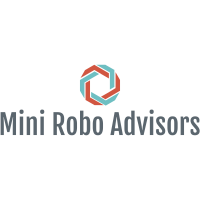

In [678]:
Mini_Robo_Advisors

In [679]:
#Effective Federal Funds Rate
FEDFUNDS_DATA = fred.get_series_all_releases('FEDFUNDS')
FEDFUNDS=FEDFUNDS_DATA.drop(["realtime_start"], axis=1)
FEDFUNDS=FEDFUNDS.set_index("date")
FEDFUNDS["value"] = pd.to_numeric(FEDFUNDS["value"], downcast="float", errors='coerce')
FEDFUNDS_LINE=FEDFUNDS["value"]

In [680]:
FEDFUNDS_Hvplot=FEDFUNDS_LINE.hvplot(title="FED Funds monthly value since 1954", 
                        x= "date", y='value', ylabel= "Value", xlabel= "Date").opts(yformatter="%.2f")

In [681]:
OBFR_DATA = fred.get_series_all_releases('OBFR')
OBFR=OBFR_DATA.drop(["realtime_start"], axis=1)
OBFR=OBFR.set_index("date")
OBFR["value"] = pd.to_numeric(OBFR["value"], downcast="float", errors='coerce')
OBFR_LINE=OBFR["value"]

In [682]:
Consumer_Price_Index_DATA = fred.get_series_all_releases('CPGRLE01USQ657N')
Consumer_Price_Index=Consumer_Price_Index_DATA.drop(["realtime_start"], axis=1)
Consumer_Price_Index=Consumer_Price_Index.set_index("date")
Consumer_Price_Index["value"] = pd.to_numeric(Consumer_Price_Index["value"], downcast="float", errors='coerce')
Consumer_Price_Index_LINE=Consumer_Price_Index["value"].dropna()

In [683]:
FED_DEBT_DATA = fred.get_series_all_releases('GFDEGDQ188S')
FED_DEBT=FED_DEBT_DATA.drop(["realtime_start"], axis=1)
FED_DEBT=FED_DEBT.set_index("date")
FED_DEBT["value"] = pd.to_numeric(FED_DEBT["value"], downcast="float", errors='coerce')
FED_DEBT_LINE=FED_DEBT["value"].dropna()

In [684]:
Gross_Domestic_Product_DATA= fred.get_series_all_releases('GDP')
Gross_Domestic_Product=Gross_Domestic_Product_DATA.drop(["realtime_start"], axis=1)
Gross_Domestic_Product=Gross_Domestic_Product.set_index("date")
Gross_Domestic_Product["value"] = pd.to_numeric(Gross_Domestic_Product["value"], downcast="float", errors='coerce')
GDP_LINE=Gross_Domestic_Product["value"].dropna()

In [685]:
Treasury_Maturity_Rate_3_Month_DATA = fred.get_series_all_releases('DGS3MO')
Treasury_Maturity_Rate_3_Month=Treasury_Maturity_Rate_3_Month_DATA.drop(["realtime_start"], axis=1)
Treasury_Maturity_Rate_3_Month=Treasury_Maturity_Rate_3_Month.set_index("date")
Treasury_Maturity_Rate_3_Month["value"] = pd.to_numeric(Treasury_Maturity_Rate_3_Month["value"], downcast="float", errors='coerce')
Treasure_Rate_3_Month=Treasury_Maturity_Rate_3_Month["value"].dropna()

In [686]:
TMR3M=Treasure_Rate_3_Month.hvplot(title="3-Month Treasury Constant Maturity Rate", 
                        x= "date", y='value', ylabel= "Value", xlabel= "Date").opts(yformatter="%.2f")
TMR3M

:Curve   [date]   (value)

In [687]:
Treasury_Maturity_Rate_1_Year_DATA = fred.get_series_all_releases('DGS1')
Treasury_Maturity_Rate_1_Year=Treasury_Maturity_Rate_1_Year_DATA.drop(["realtime_start"], axis=1)
Treasury_Maturity_Rate_1_Year=Treasury_Maturity_Rate_1_Year.set_index("date")
Treasury_Maturity_Rate_1_Year["value"] = pd.to_numeric(Treasury_Maturity_Rate_1_Year["value"], downcast="float", errors='coerce')
Treasure_Rate_1_Year=Treasury_Maturity_Rate_1_Year["value"].dropna()

In [688]:
TMR1Y=Treasure_Rate_1_Year.hvplot(title="1-Year Treasury Constant Maturity Rate", 
                        x= "date", y='value', ylabel= "Value", xlabel= "Date").opts(yformatter="%.2f")

In [689]:
Treasury_Maturity_Rate_6_Month_DATA = fred.get_series_all_releases('DGS6MO')
Treasury_Maturity_Rate_6_Month=Treasury_Maturity_Rate_6_Month_DATA.drop(["realtime_start"], axis=1)
Treasury_Maturity_Rate_6_Month=Treasury_Maturity_Rate_6_Month.set_index("date")
Treasury_Maturity_Rate_6_Month["value"] = pd.to_numeric(Treasury_Maturity_Rate_6_Month["value"], downcast="float", errors='coerce')
Treasure_Rate_6_Month=Treasury_Maturity_Rate_6_Month["value"].dropna()

In [690]:
TMR6M=Treasure_Rate_6_Month.hvplot(title="6-Month Treasury Constant Maturity Rate", 
                        x= "date", y='value', ylabel= "Value", xlabel= "Date").opts(yformatter="%.2f")

In [691]:
Treasury_Maturity_Rate_2_Year_DATA = fred.get_series_all_releases('DGS2')
Treasury_Maturity_Rate_2_Year=Treasury_Maturity_Rate_2_Year_DATA.drop(["realtime_start"], axis=1)
Treasury_Maturity_Rate_2_Year=Treasury_Maturity_Rate_2_Year.set_index("date")
Treasury_Maturity_Rate_2_Year["value"] = pd.to_numeric(Treasury_Maturity_Rate_2_Year["value"], downcast="float", errors='coerce')
Treasure_Rate_2_Years=Treasury_Maturity_Rate_2_Year["value"].dropna()

In [692]:
TMR2Y=Treasure_Rate_2_Years.hvplot(title="2-Year Treasury Constant Maturity Rate", 
                        x= "date", y='value', ylabel= "Value", xlabel= "Date").opts(yformatter="%.2f")

In [693]:
Treasury_Maturity_Rate_3_Year_DATA = fred.get_series_all_releases('DGS3')
Treasury_Maturity_Rate_3_Year=Treasury_Maturity_Rate_3_Year_DATA.drop(["realtime_start"], axis=1)
Treasury_Maturity_Rate_3_Year=Treasury_Maturity_Rate_3_Year.set_index("date")
Treasury_Maturity_Rate_3_Year["value"] = pd.to_numeric(Treasury_Maturity_Rate_3_Year["value"], downcast="float", errors='coerce')
Treasure_Rate_3_Years=Treasury_Maturity_Rate_3_Year["value"].dropna()

In [694]:
TMR3Y=Treasure_Rate_3_Years.hvplot(title="3-Year Treasury Constant Maturity Rate", 
                        x= "date", y='value', ylabel= "Value", xlabel= "Date").opts(yformatter="%.2f")

In [695]:
Treasury_Maturity_Rate_5_Year_DATA = fred.get_series_all_releases('DGS5')
Treasury_Maturity_Rate_5_Year=Treasury_Maturity_Rate_5_Year_DATA.drop(["realtime_start"], axis=1)
Treasury_Maturity_Rate_5_Year=Treasury_Maturity_Rate_5_Year.set_index("date")
Treasury_Maturity_Rate_5_Year["value"] = pd.to_numeric(Treasury_Maturity_Rate_5_Year["value"], downcast="float", errors='coerce')
Treasure_Rate_5_Years=Treasury_Maturity_Rate_5_Year["value"].dropna()

In [696]:
TMR5Y=Treasure_Rate_5_Years.hvplot(title="5-Year Treasury Constant Maturity Rate", 
                        x= "date", y='value', ylabel= "Value", xlabel= "Date").opts(yformatter="%.2f")

In [697]:
Treasury_Maturity_Rate_7_Year_DATA = fred.get_series_all_releases('DGS7')
Treasury_Maturity_Rate_7_Year=Treasury_Maturity_Rate_7_Year_DATA.drop(["realtime_start"], axis=1)
Treasury_Maturity_Rate_7_Year=Treasury_Maturity_Rate_7_Year.set_index("date")
Treasury_Maturity_Rate_7_Year["value"] = pd.to_numeric(Treasury_Maturity_Rate_7_Year["value"], downcast="float", errors='coerce')
Treasure_Rate_7_Years=Treasury_Maturity_Rate_7_Year["value"].dropna()

In [698]:
TMR7Y=Treasure_Rate_7_Years.hvplot(title="7-Year Treasury Constant Maturity Rate", 
                        x= "date", y='value', ylabel= "Value", xlabel= "Date").opts(yformatter="%.2f")

In [699]:
Treasury_Maturity_Rate_10_Year_DATA = fred.get_series_all_releases('DGS10')
Treasury_Maturity_Rate_10_Year=Treasury_Maturity_Rate_10_Year_DATA.drop(["realtime_start"], axis=1)
Treasury_Maturity_Rate_10_Year=Treasury_Maturity_Rate_10_Year.set_index("date")
Treasury_Maturity_Rate_10_Year["value"] = pd.to_numeric(Treasury_Maturity_Rate_10_Year["value"], downcast="float", errors='coerce')
Treasure_Rate_10_Years=Treasury_Maturity_Rate_10_Year["value"].dropna()

In [700]:
TMR10Y=Treasure_Rate_10_Years.hvplot(title="10-Year Treasury Constant Maturity Rate", 
                        x= "date", y='value', ylabel= "Value", xlabel= "Date").opts(yformatter="%.2f")

In [701]:
Treasury_Maturity_Rate_20_Year_DATA = fred.get_series_all_releases('DGS20')
Treasury_Maturity_Rate_20_Year=Treasury_Maturity_Rate_20_Year_DATA.drop(["realtime_start"], axis=1)
Treasury_Maturity_Rate_20_Year=Treasury_Maturity_Rate_20_Year.set_index("date")
Treasury_Maturity_Rate_20_Year["value"] = pd.to_numeric(Treasury_Maturity_Rate_20_Year["value"], downcast="float", errors='coerce')
Treasure_Rate_20_Years=Treasury_Maturity_Rate_20_Year["value"].dropna()

In [702]:
TMR20Y=Treasure_Rate_20_Years.hvplot(title="20-Year Treasury Constant Maturity Rate", 
                        x= "date", y='value', ylabel= "Value", xlabel= "Date").opts(yformatter="%.2f")

In [703]:
Treasury_Maturity_Rate_30_Year_DATA = fred.get_series_all_releases('DGS30')
Treasury_Maturity_Rate_30_Year=Treasury_Maturity_Rate_30_Year_DATA.drop(["realtime_start"], axis=1)
Treasury_Maturity_Rate_30_Year=Treasury_Maturity_Rate_30_Year.set_index("date")
Treasury_Maturity_Rate_30_Year["value"] = pd.to_numeric(Treasury_Maturity_Rate_30_Year["value"], downcast="float", errors='coerce')
Treasure_Rate_30_Years=Treasury_Maturity_Rate_30_Year["value"].dropna()

In [704]:
TMR30Y=Treasure_Rate_30_Years.hvplot(title="30-Year Treasury Constant Maturity Rate", 
                        x= "date", y='value', ylabel= "Value", xlabel= "Date").opts(yformatter="%.2f")
TMR30Y

:Curve   [date]   (value)

In [705]:
MC_Tabs = pn.Tabs(("Welcome",pn.Column (Mini_Robo_Advisors, "Thank you for choosing Mini Robo Advisors to aid with your financial needs."
                   " Determining where to invest, how much money to invest and how long you should be investing for are all difficult questions."
                   " No one is born to be a Master investor! That's why we are here."
                  " As Mini Robo Advisors we provide an automated service that takes your own answers and creates your perfect portfolio.")),
                  ("Personal Tab",pn.Column(" Based on the information you provided from the KYC,"
                                           "  your recommended Portfolio is:", Personal_Portfolio_ETF_Weights, 
                                           "Based on the information you provided from the KYC and historical daily returns,"
                                           " your initial investment of $25,000 will be $28,806 by next year.", Initital_Investment_Personal_HVPLOT)),
                  ("About Our Investment",pn.Column("Here is an illustration for all of our investment portfolios.", Tabs1 ,"Summary of constituents with our underlying ETF's.", Top10_Location_Hvplot, "Details on the underlying diversification of each ETF.  In General, the greater the number of constituents the greater the diversification, all else equal.  The Pearson Correlation is a more commonly used measure to determine how how diversified a portfolio is.", Total_Number_of_Stocks_Hvplot)),
                 ("About Our Investment Cont",pn.Column(Portfolio_ETF_Weights, Violin_Chart)),
                  ("Treasury Maturity Rate",pn.Column(TMR3M, TMR6M, TMR1Y, TMR2Y, TMR3Y,
                                                       TMR5Y, TMR7Y, TMR10Y, TMR20Y, TMR30Y)),
                 ("Economial Data", FEDFUNDS_Hvplot)
                  )

Tabs
    [0] Column
        [0] PNG(Image)
        [1] Markdown(str)
    [1] Column
        [0] Markdown(str)
        [1] HoloViews(Bars)
        [2] Markdown(str)
        [3] HoloViews(Curve)
    [2] Column
        [0] Markdown(str)
        [1] HoloViews(NdOverlay)
        [2] Markdown(str)
        [3] HoloViews(Bars)
        [4] Markdown(str)
        [5] HoloViews(Bars)
    [3] Column
        [0] Row
            [0] HoloViews(DynamicMap)
            [1] Column
                [0] WidgetBox
                    [0] Select(margin=(20, 20, 20, 20), name='Portfolio', options=['Mini Robo Advisors Ultra...], value='Mini Robo Advisors U..., width=250)
                [1] VSpacer()
        [1] HoloViews(Violin)
    [4] Column
        [0] HoloViews(Curve)
        [1] HoloViews(Curve)
        [2] HoloViews(Curve)
        [3] HoloViews(Curve)
        [4] HoloViews(Curve)
        [5] HoloViews(Curve)
        [6] HoloViews(Curve)
        [7] HoloViews(Curve)
        [8] HoloViews(Curve)
        [9] HoloViews(Curve)
    [5] HoloViews(Curve, name='Economial Data')
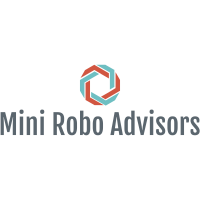

In [706]:
MC_Tabs.servable()

In [707]:
Treasury_Maturity_Rate_30_Year_DATA = fred.get_series_all_releases('DGS30')
Treasury_Maturity_Rate_30_Year=Treasury_Maturity_Rate_30_Year_DATA.drop(["realtime_start"], axis=1)
Treasury_Maturity_Rate_30_Year=Treasury_Maturity_Rate_30_Year.set_index("date")
Treasury_Maturity_Rate_30_Year["value"] = pd.to_numeric(Treasury_Maturity_Rate_30_Year["value"], downcast="float", errors='coerce')
TMR30YEARS=Treasury_Maturity_Rate_30_Year["value"].dropna()

In [708]:
def create_line_chart(data, title, xlabel, ylabel, color):
    """
    Create a line chart based in the data argument.
    """
    
    fig = plt.figure(figsize=(8, 4))
    bar_chart = data.plot(color=color)
    bar_chart.set_xlabel(xlabel, fontsize=12)
    bar_chart.set_ylabel(ylabel, fontsize=12)
    bar_chart.set_title(title, fontsize=14, fontweight="bold")    
    plt.close(fig)
    
    return pn.pane.Matplotlib(fig, tight=True)

Matplotlib(Figure, tight=True)
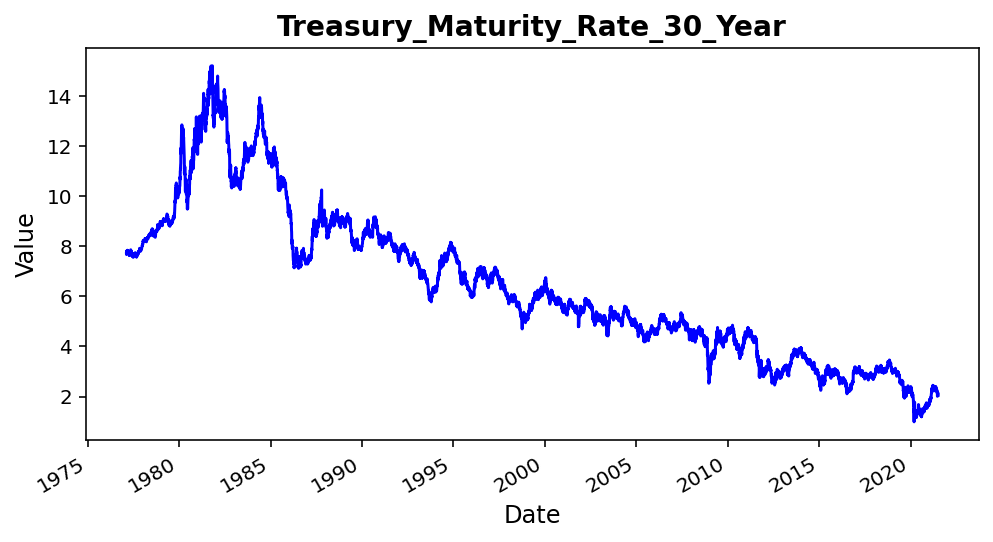

In [709]:
create_line_chart(TMR30YEARS,"Treasury_Maturity_Rate_30_Year", "Date", "Value", "Blue" )

Matplotlib(Figure, tight=True)
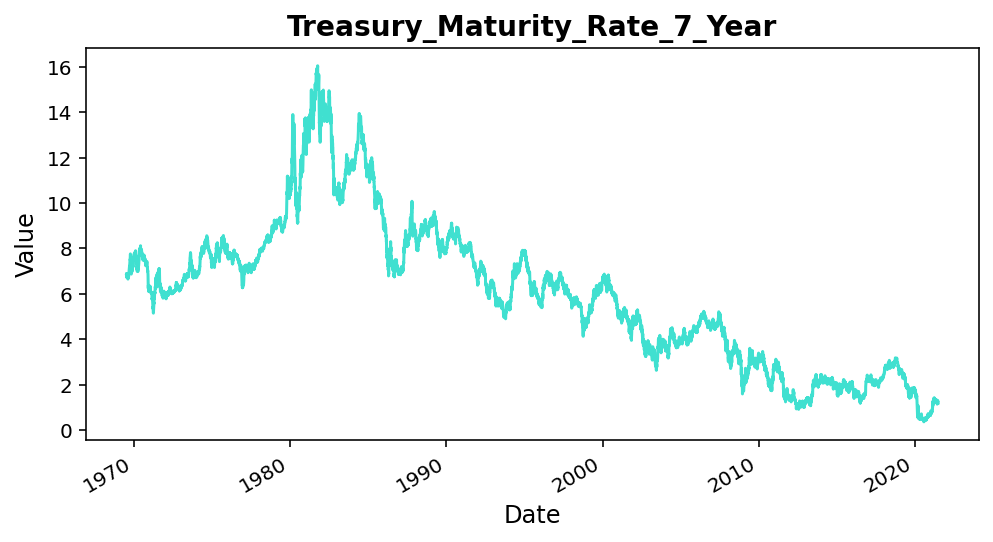

In [710]:
create_line_chart(Treasure_Rate_7_Years,"Treasury_Maturity_Rate_7_Year", "Date", "Value", "Turquoise" )

In [711]:
MC_Tabs_2 = pn.Tabs(("Welcome",pn.Column (Mini_Robo_Advisors, "Thank you for choosing Mini Robo Advisors to aid with your financial needs."
                   " Determining where to invest, how much money to invest and how long you should be investing for are all difficult questions."
                   " No one is born to be a Master investor! That's why we are here."
                  " As Mini Robo Advisors we provide an automated service that takes your own answers and creates your perfect portfolio.")),
                  ("Personal Tab",pn.Column(" Based on the information you provided from the KYC,"
                                           "  your recommended Portfolio is:", Personal_Portfolio_ETF_Weights, 
                                           "Based on the information you provided from the KYC and historical daily returns,"
                                           " your initial investment of $25,000 will be $28,806 by next year.", Initital_Investment_Personal_HVPLOT)),
                  ("About Our Investment",pn.Column("Here is an illustration for all of our investment portfolios.", Tabs1 ,"Summary of constituents with our underlying ETF's.", Top10_Location_Hvplot, "Details on the underlying diversification of each ETF.  In General, the greater the number of constituents the greater the diversification, all else equal.  The Pearson Correlation is a more commonly used measure to determine how how diversified a portfolio is.", Total_Number_of_Stocks_Hvplot)),
                 ("About Our Investment Cont",pn.Column(Portfolio_ETF_Weights, Violin_Chart)),
                  ("Treasury Maturity Rate",pn.Column(create_line_chart(Treasure_Rate_3_Month,
                                                                        "Treasury Maturity Rate 3 Month", 
                                                                        "Date", 
                                                                        "Value", 
                                                                        "Turquoise"),
                                                      create_line_chart(Treasure_Rate_6_Month,"Treasury_Maturity_Rate_6 Month", "Date", "Value", "Turquoise"),
                                                      create_line_chart(Treasure_Rate_1_Year,"Treasury_Maturity_Rate_1_Year", "Date", "Value", "Turquoise" ),
                                                      create_line_chart(Treasure_Rate_2_Years,"Treasury_Maturity_Rate_2_Year", "Date", "Value", "Turquoise" ),
                                                      create_line_chart(Treasure_Rate_3_Years,"Treasury_Maturity_Rate_3_Year", "Date", "Value", "Turquoise" ),
                                                      create_line_chart(Treasure_Rate_5_Years,"Treasury_Maturity_Rate_5_Year", "Date", "Value", "Turquoise" ),
                                                      create_line_chart(Treasure_Rate_7_Years,"Treasury_Maturity_Rate_7_Year", "Date", "Value", "Turquoise" ),
                                                      create_line_chart(Treasure_Rate_10_Years,"Treasury_Maturity_Rate_10_Year", "Date", "Value", "Turquoise" ),
                                                      create_line_chart(Treasure_Rate_20_Years,"Treasury_Maturity_Rate_20_Year", "Date", "Value", "Turquoise" ),
                                                      create_line_chart(Treasure_Rate_30_Years,"Treasury_Maturity_Rate_30_Year", "Date", "Value", "Turquoise" )
                                                       )),
                 ("Economial Data", pn.Column(create_line_chart(FEDFUNDS_LINE,"Effective Federal Funds Rate", "Date", "Value", "Turquoise"),
                                             create_line_chart(OBFR_LINE,"Overnight Bank Funding Rate", "Date", "Value", "Turquoise"),
                                             create_line_chart(Consumer_Price_Index_LINE,"Consumer Price Index: OECD Groups", "Date", "Value", "Turquoise"),
                                             create_line_chart(FED_DEBT_LINE,"Federal Debt", "Date", "Value", "Turquoise"),
                                             create_line_chart(GDP_LINE,"Gross Domestic Product for USA", "Date", "Value", "Turquoise"))))
                  

Tabs
    [0] Column
        [0] PNG(Image)
        [1] Markdown(str)
    [1] Column
        [0] Markdown(str)
        [1] HoloViews(Bars)
        [2] Markdown(str)
        [3] HoloViews(Curve)
    [2] Column
        [0] Markdown(str)
        [1] HoloViews(NdOverlay)
        [2] Markdown(str)
        [3] HoloViews(Bars)
        [4] Markdown(str)
        [5] HoloViews(Bars)
    [3] Column
        [0] Row
            [0] HoloViews(DynamicMap)
            [1] Column
                [0] WidgetBox
                    [0] Select(margin=(20, 20, 20, 20), name='Portfolio', options=['Mini Robo Advisors Ultra...], value='Mini Robo Advisors U..., width=250)
                [1] VSpacer()
        [1] HoloViews(Violin)
    [4] Column
        [0] Matplotlib(Figure, tight=True)
        [1] Matplotlib(Figure, tight=True)
        [2] Matplotlib(Figure, tight=True)
        [3] Matplotlib(Figure, tight=True)
        [4] Matplotlib(Figure, tight=True)
        [5] Matplotlib(Figure, tight=True)
        [6] Matplotlib(Figure, tight=True)
        [7] Matplotlib(Figure, tight=True)
        [8] Matplotlib(Figure, tight=True)
        [9] Matplotlib(Figure, tight=True)
    [5] Column
        [0] Matplotlib(Figure, tight=True)
        [1] Matplotlib(Figure, tight=True)
        [2] Matplotlib(Figure, tight=True)
        [3] Matplotlib(Figure, tight=True)
        [4] Matplotlib(Figure, tight=True)
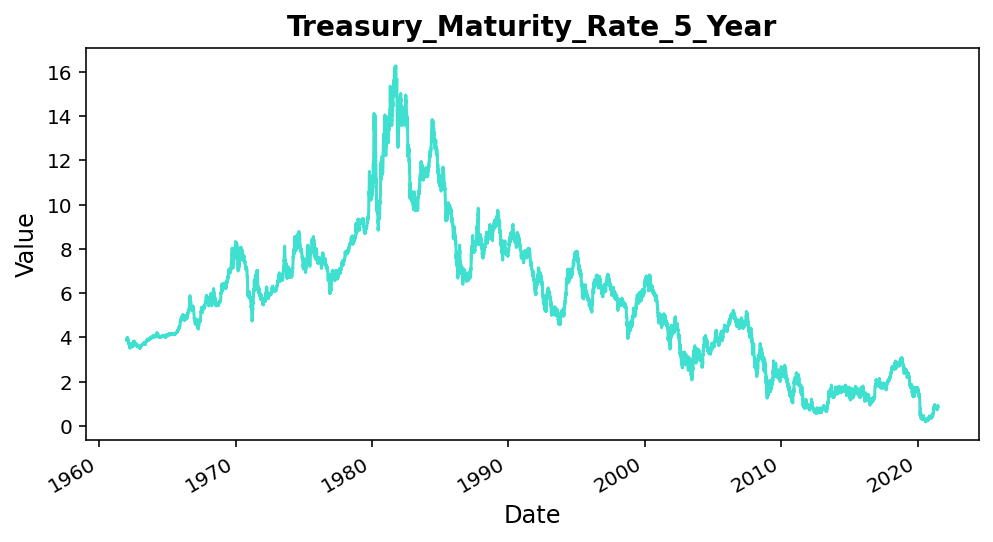
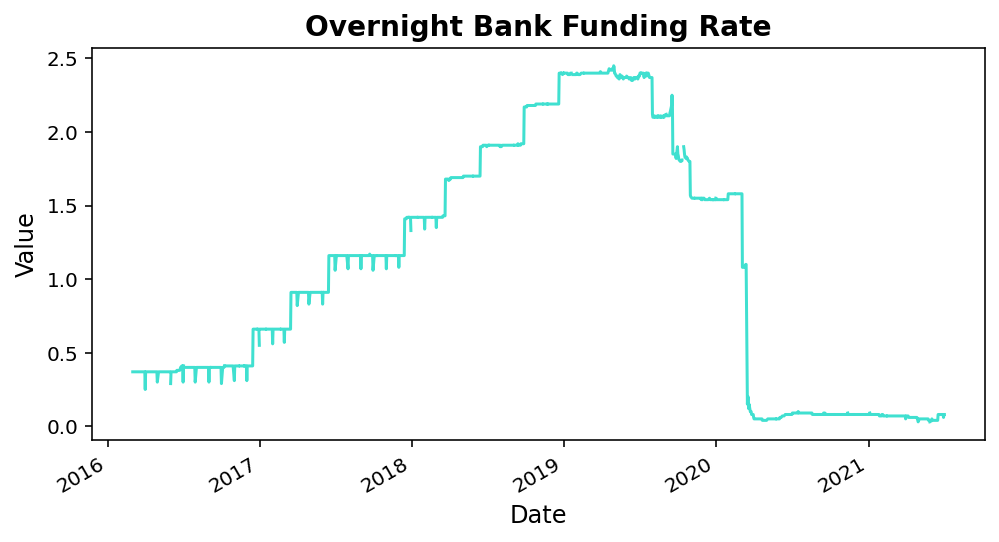
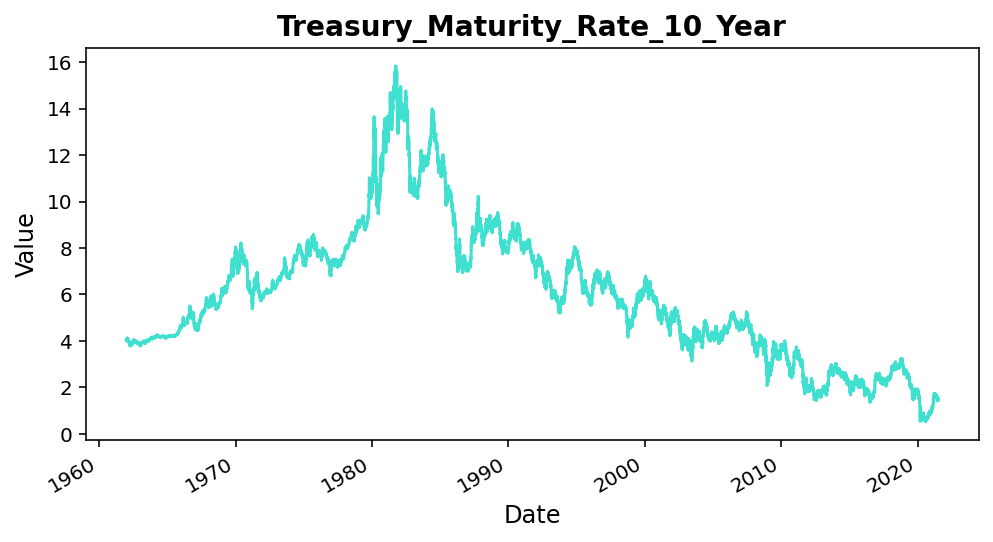
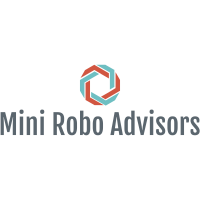
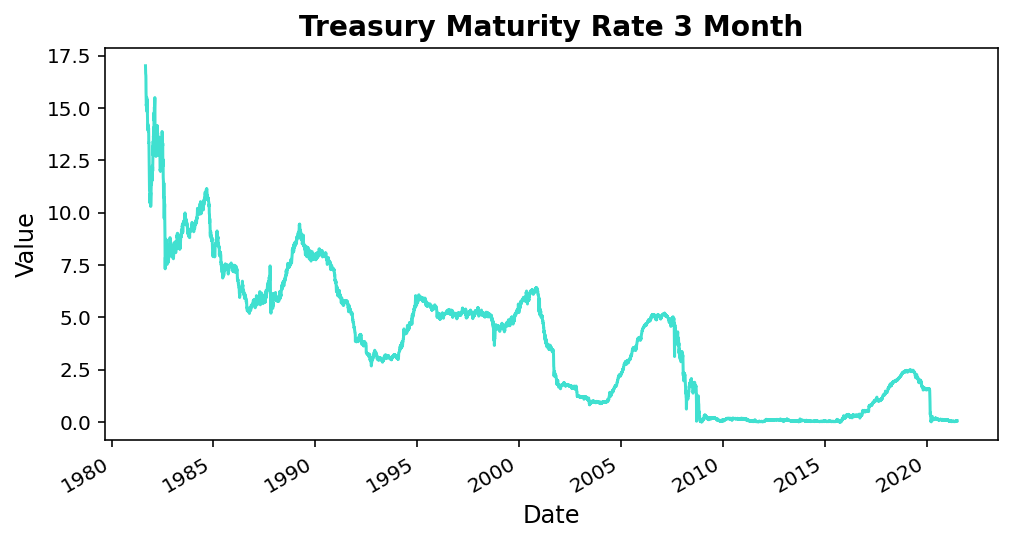
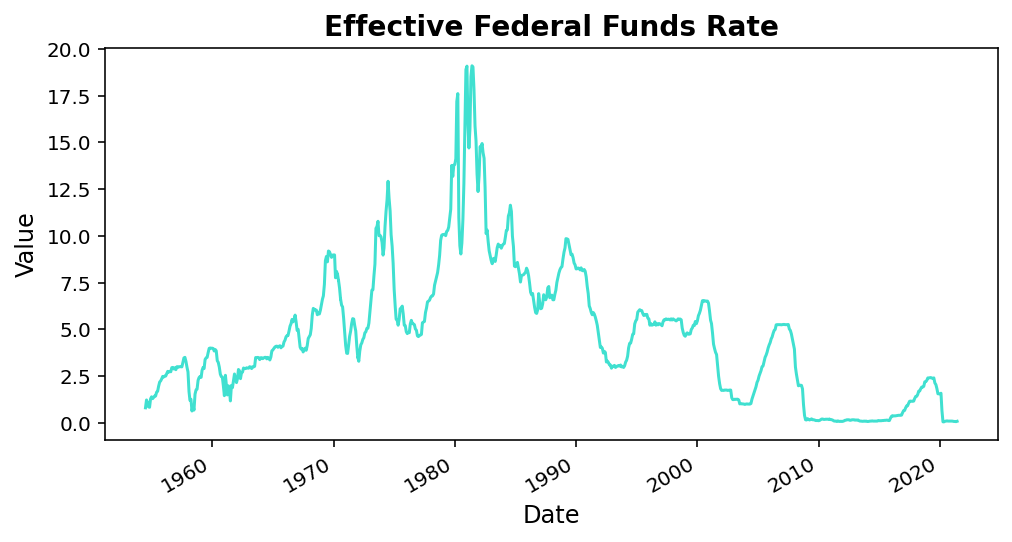
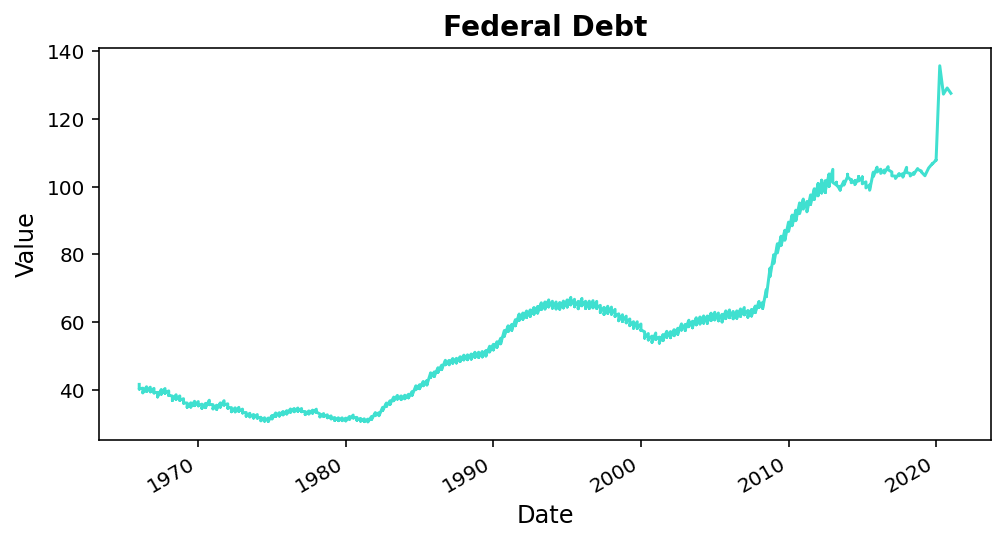
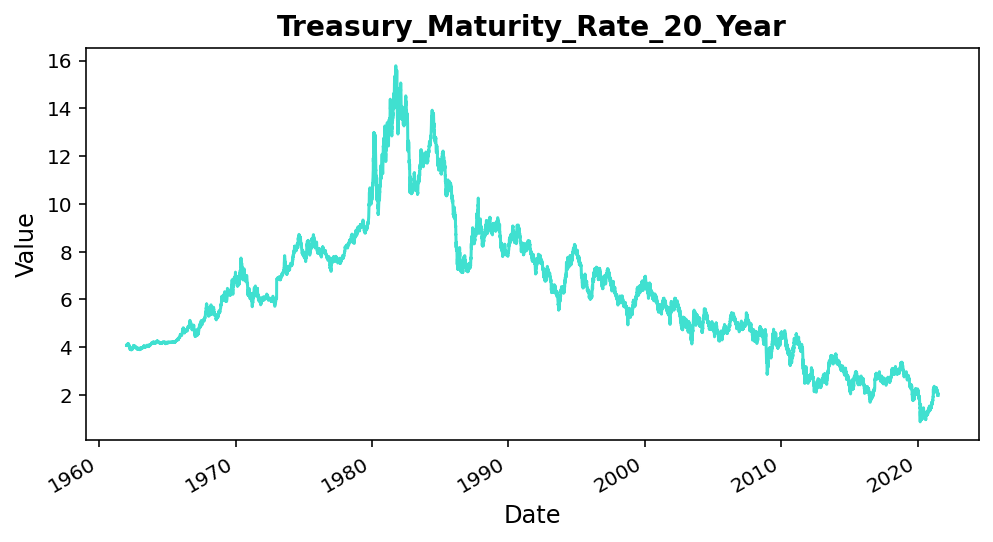
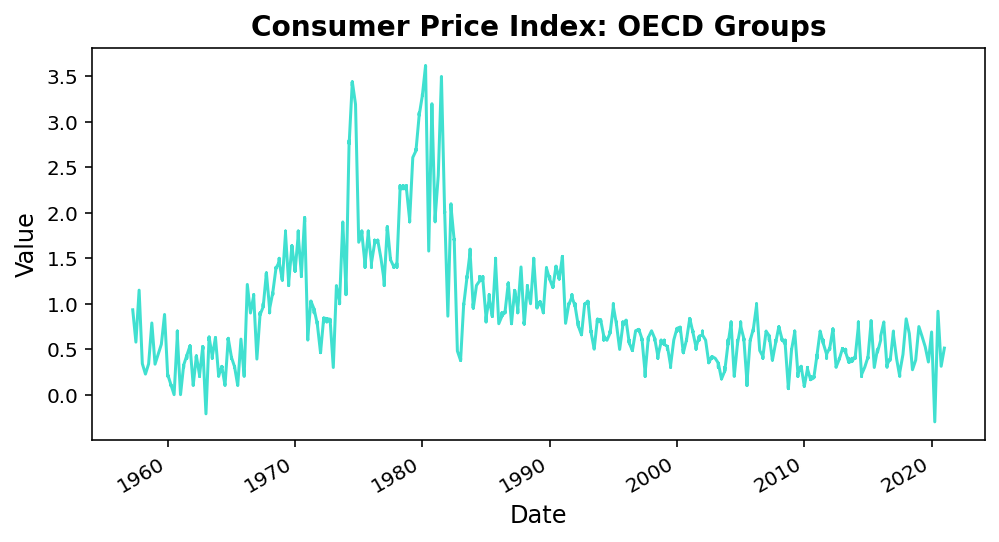
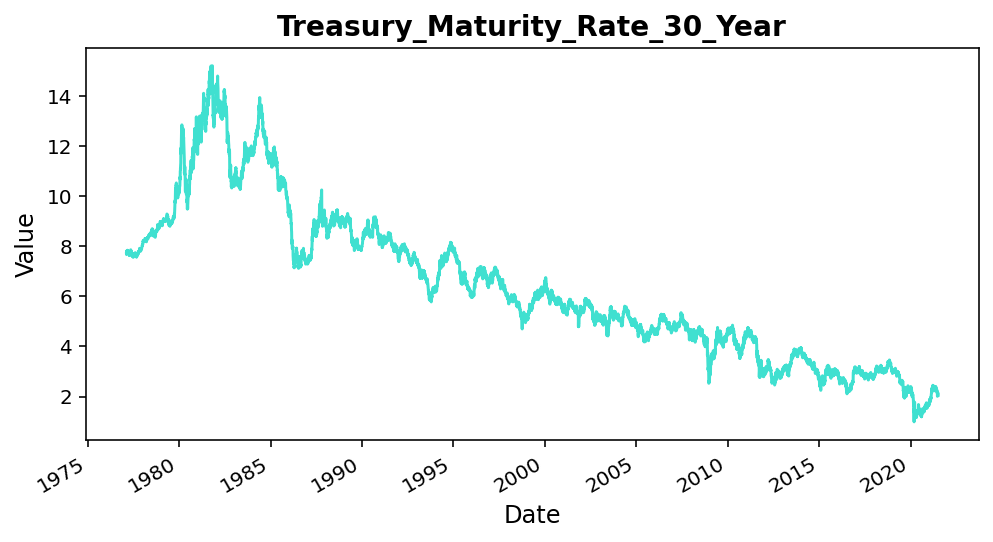
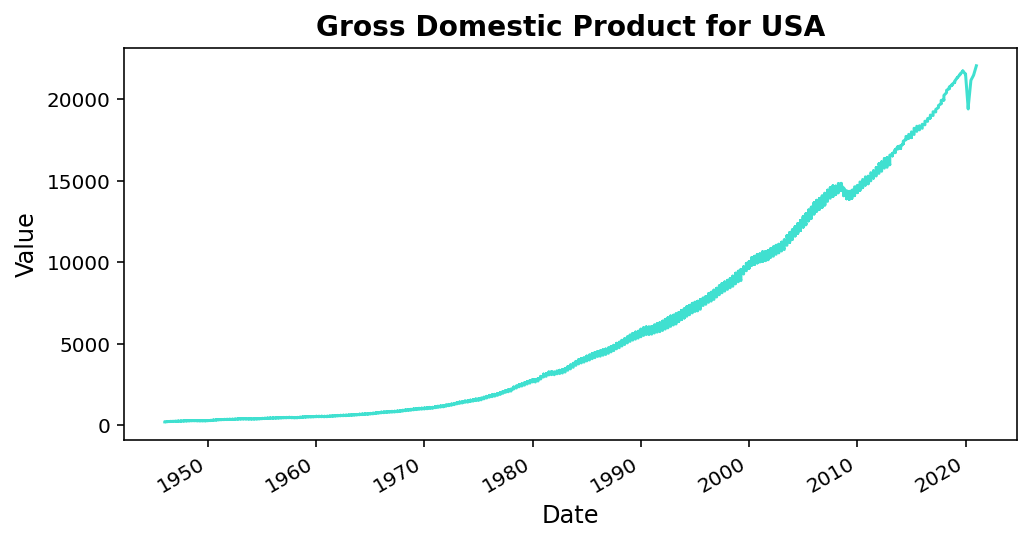
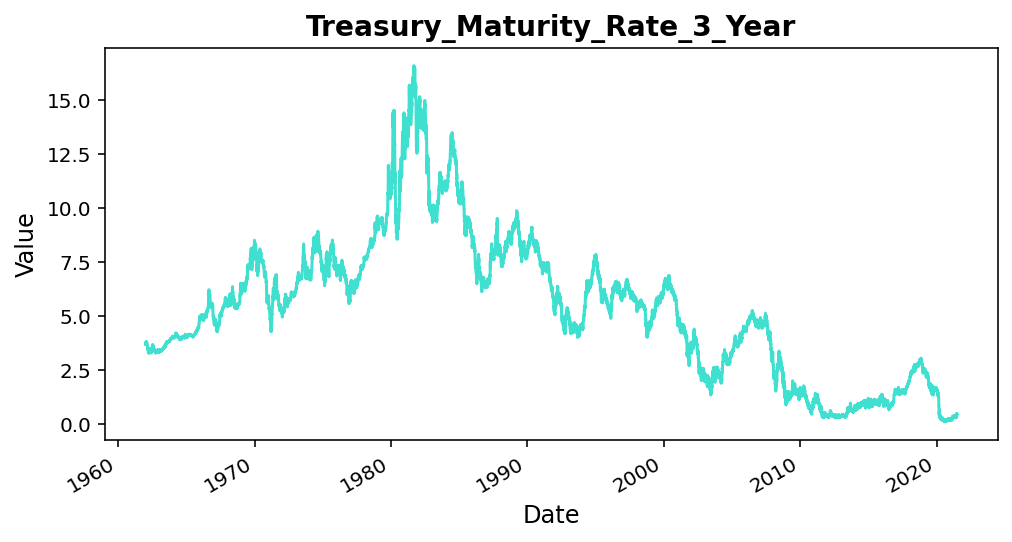
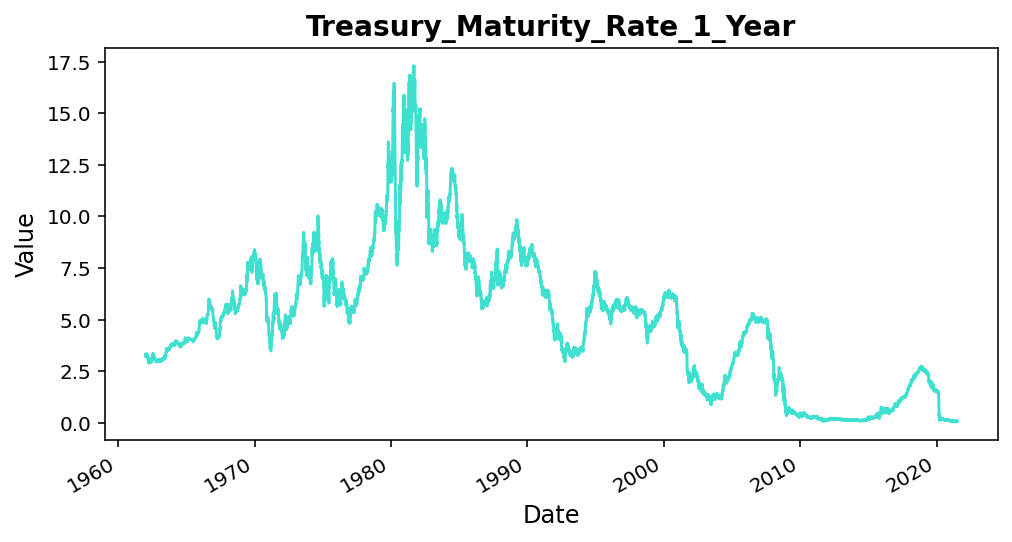
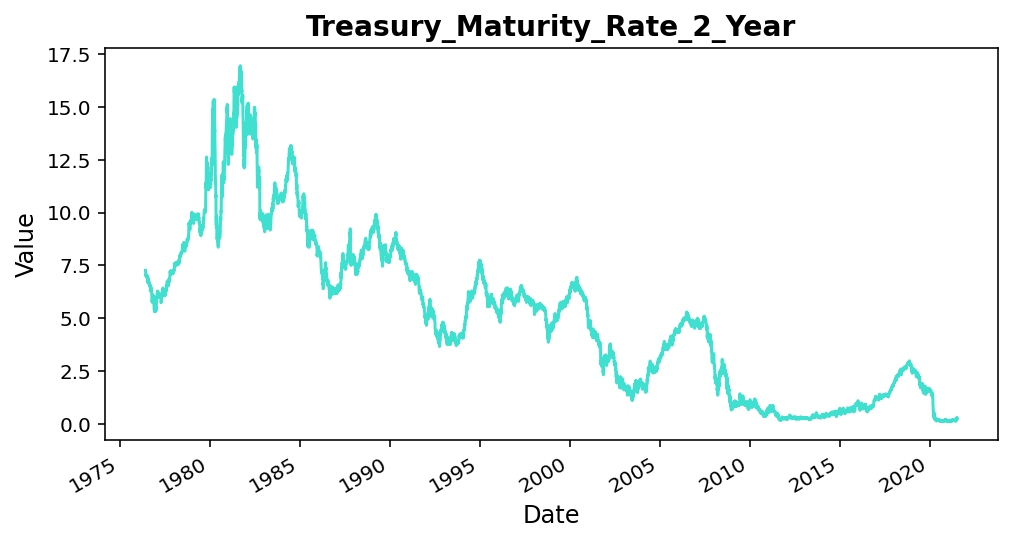
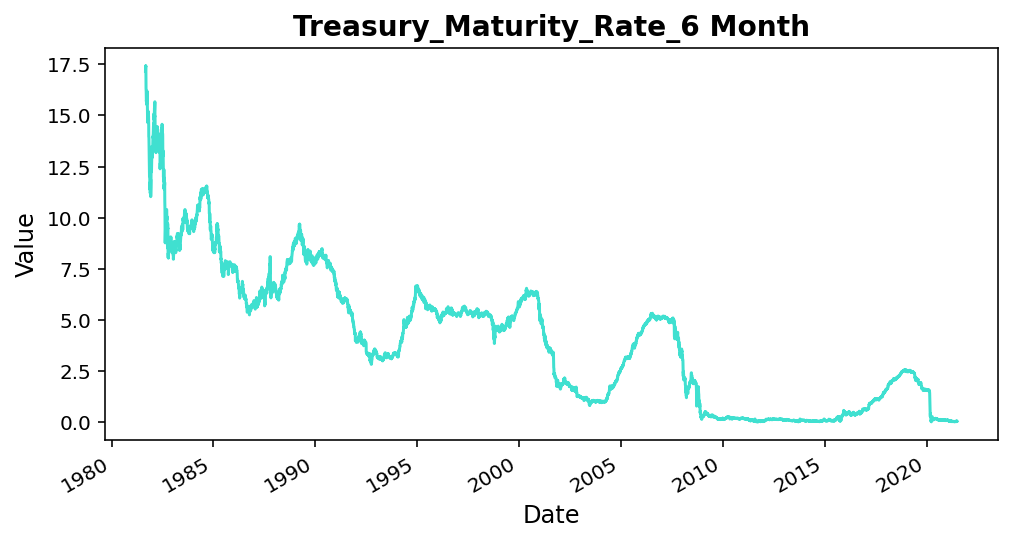
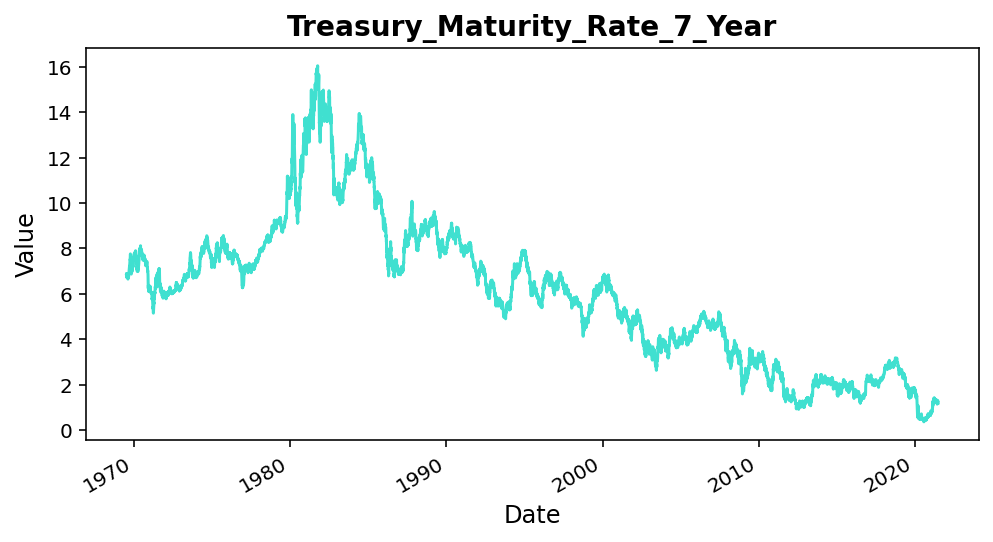

In [712]:
MC_Tabs_2